In [19]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [21]:
data = pd.read_csv(r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\Data S1_modeling data_withdraw country names.csv")
numeric_data = data.select_dtypes(include=[np.number])

In [23]:
x = data.drop(columns=['Pollutant'])
y = data['Pollutant']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

xgbr = XGBRegressor(
    n_estimators=100,
    learning_rate=0.3,
    max_depth=4,
    subsample=1,
    colsample_bytree=0.8,
    gamma=0.013,
    random_state=42
)
xgbr.fit(x_train, y_train)

y_pred = xgbr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)

Mean Squared Error (MSE): 246082639.56408656
Mean Absolute Error (MAE): 10690.246259614876
R-squared (R2): 0.9538797450349779


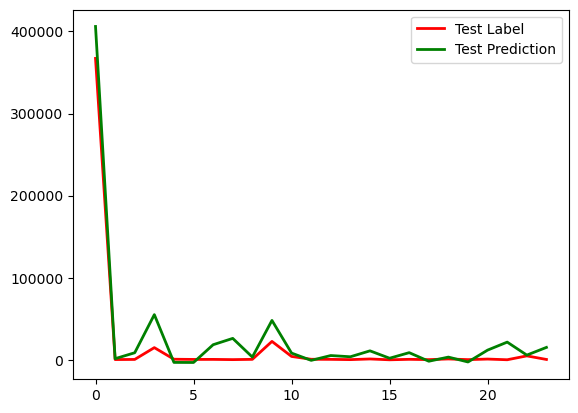

0.9538797450349779

In [57]:
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r', linewidth=2, label='Test Label')
plt.plot(t, y_pred, 'g', linewidth=2, label='Test Prediction')
plt.legend()
plt.show()
xgbr.score(x_test, y_test)

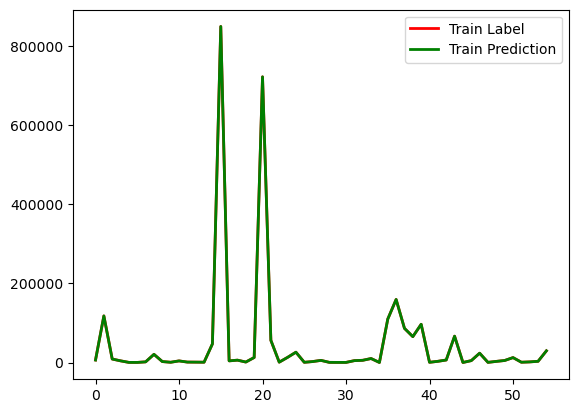

0.9999999999998025

In [55]:
y_pred_train = xgbr.predict(x_train)
t = np.arange(len(x_train))

plt.plot(t, y_train, 'r', linewidth = 2, label = 'Train Label')

plt.plot(t, y_pred_train, 'g', linewidth = 2, label = 'Train Prediction')

plt.legend()
plt.show()
xgbr.score(x_train, y_train)

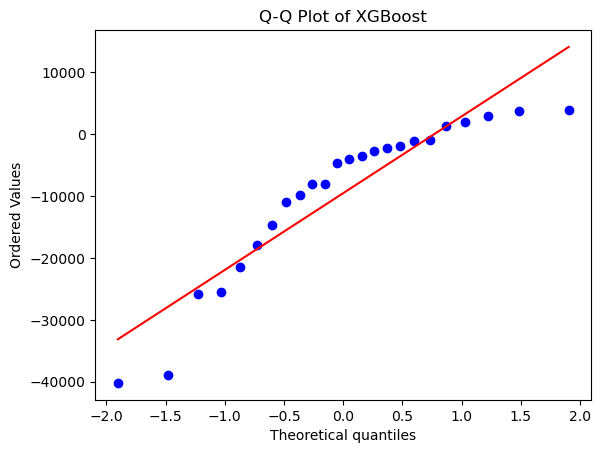

绘图数据已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\其他模型\xgboost\Q-Q_test.csv


In [102]:
import pandas as pd
import scipy.stats as stats

residuals = y_test - y_pred
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of XGBoost")
plt.show()

(osm, osr), _ = stats.probplot(residuals, dist="norm")
qq_df = pd.DataFrame({'Theoretical Quantiles': osm, 'Ordered Values': osr})

output_path = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\其他模型\xgboost"
os.makedirs(output_path, exist_ok=True)
output_file = os.path.join(output_path, "Q-Q_test.csv")

qq_df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"绘图数据已保存至: {output_file}")

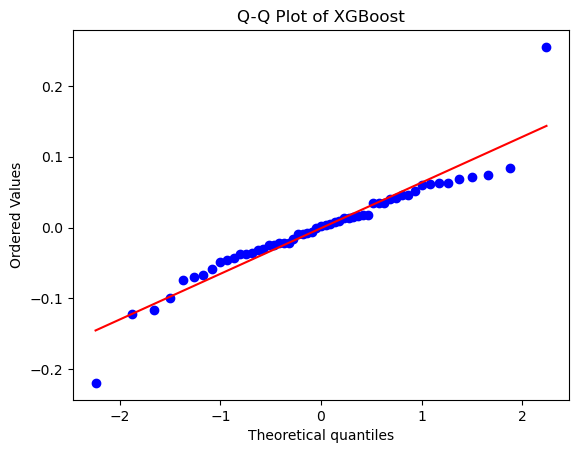

绘图数据已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\其他模型\xgboost\Q-Q_train.csv


In [104]:
import pandas as pd
import scipy.stats as stats

residuals = y_train - y_pred_train

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of XGBoost")
plt.show()

(osm, osr), _ = stats.probplot(residuals, dist="norm")
qq_df = pd.DataFrame({'Theoretical Quantiles': osm, 'Ordered Values': osr})

output_path = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\其他模型\xgboost"
os.makedirs(output_path, exist_ok=True)
output_file = os.path.join(output_path, "Q-Q_train.csv")

qq_df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"绘图数据已保存至: {output_file}")

In [87]:
import pandas as pd
import scipy.stats as stats

residuals = y_train - y_pred_train

(osm, osr), _ = stats.probplot(residuals, dist="norm")
qq_df = pd.DataFrame({'Theoretical Quantiles': osm, 'Ordered Values': osr})

output_path = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\其他模型\xgboost"
os.makedirs(output_path, exist_ok=True)
output_file = os.path.join(output_path, "Q-Q_train.csv")

qq_df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"绘图数据已保存至: {output_file}")

绘图数据已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\其他模型\xgboost\Q-Q_train.csv


In [108]:
output_path = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\其他模型\xgboost"
os.makedirs(output_path, exist_ok=True)
output_file = os.path.join(output_path, "Q-Q_train_plot.png")

plt.figure()
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of XGBoost")
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.close()

print(f"Q-Q图已保存至: {output_file}")

Q-Q图已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\其他模型\xgboost\Q-Q_train_plot.png


In [7]:
new_data = pd.read_csv(r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\Data S2_forecast data.csv")
new_data_preprocessed = new_data[x.columns]

In [8]:
feature_error_ratio = 0.05
min_std = 0.01

n_mc = 10000 
all_preds = []

for i in range(n_mc):
    perturbed = new_data_preprocessed.copy()
    for col in perturbed.columns:
        base = perturbed[col].values
        std = np.maximum(np.abs(base * feature_error_ratio), min_std)
        noise = np.random.normal(0, std)
        perturbed[col] += noise
    preds = xgbr.predict(perturbed)
    all_preds.append(preds)

all_preds = np.array(all_preds)  # (n_mc, n_samples)

In [9]:
mean_pred = np.mean(all_preds, axis=0)
lower_pred = np.percentile(all_preds, 2.5, axis=0)
upper_pred = np.percentile(all_preds, 97.5, axis=0)

for i in range(len(mean_pred)):
    print(f"样本{i}: 预测均值={mean_pred[i]:.3f}, 95%置信区间=({lower_pred[i]:.3f}, {upper_pred[i]:.3f})")

样本0: 预测均值=34219.320, 95%置信区间=(32042.422, 40727.270)
样本1: 预测均值=1431.663, 95%置信区间=(592.539, 1891.232)
样本2: 预测均值=10056.535, 95%置信区间=(9087.121, 10825.134)
样本3: 预测均值=-145.212, 95%置信区间=(-886.429, 1412.417)
样本4: 预测均值=1020.897, 95%置信区间=(-674.943, 5009.444)
样本5: 预测均值=-287.537, 95%置信区间=(-1058.583, 382.810)
样本6: 预测均值=-1227.090, 95%置信区间=(-2066.306, -467.125)
样本7: 预测均值=4775.202, 95%置信区间=(4360.036, 5354.511)
样本8: 预测均值=4534.075, 95%置信区间=(3917.935, 5022.860)
样本9: 预测均值=301.095, 95%置信区间=(-334.958, 666.741)
样本10: 预测均值=12592.315, 95%置信区间=(11884.300, 18778.938)
样本11: 预测均值=13700.579, 95%置信区间=(3012.572, 15708.719)
样本12: 预测均值=-203.110, 95%置信区间=(-890.381, 300.545)
样本13: 预测均值=3443.379, 95%置信区间=(1913.827, 9699.549)
样本14: 预测均值=16918.684, 95%置信区间=(14996.739, 23557.355)
样本15: 预测均值=5467.452, 95%置信区间=(4848.533, 6839.155)
样本16: 预测均值=3413.649, 95%置信区间=(2685.853, 3972.372)
样本17: 预测均值=2389.290, 95%置信区间=(1151.756, 3271.442)
样本18: 预测均值=9043.827, 95%置信区间=(4753.289, 13356.957)
样本19: 预测均值=5649.134, 95%置信区间=(3914.990, 7253.013

In [10]:
output_df = pd.DataFrame({
    'Mean_Prediction': mean_pred,
    'Lower_95CI': lower_pred,
    'Upper_95CI': upper_pred
})
output_path = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\Data S3_output data of Monte Carlo simulation.csv"
output_df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"带置信区间的预测结果已保存至: {output_path}")

带置信区间的预测结果已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\完整预测数据集_蒙特卡罗置信区间.csv


In [11]:
import numpy as np
from scipy.stats import mode

mean_pred = np.mean(all_preds, axis=0)
median_pred = np.median(all_preds, axis=0)
lower_pred = np.percentile(all_preds, 2.5, axis=0)
upper_pred = np.percentile(all_preds, 97.5, axis=0)

mode_pred, _ = mode(all_preds, axis=0, keepdims=False)

for i in range(len(mean_pred)):
    print(f"样本{i}: 均值={mean_pred[i]:.3f}, 中位数={median_pred[i]:.3f}, 众数={mode_pred[i]:.3f}, 95%置信区间=({lower_pred[i]:.3f}, {upper_pred[i]:.3f})")

样本0: 均值=34219.320, 中位数=32918.559, 众数=32860.957, 95%置信区间=(32042.422, 40727.270)
样本1: 均值=1431.663, 中位数=1755.275, 众数=1856.599, 95%置信区间=(592.539, 1891.232)
样本2: 均值=10056.535, 中位数=9849.102, 众数=9790.514, 95%置信区间=(9087.121, 10825.134)
样本3: 均值=-145.212, 中位数=82.002, 众数=84.772, 95%置信区间=(-886.429, 1412.417)
样本4: 均值=1020.897, 中位数=567.847, 众数=76.651, 95%置信区间=(-674.943, 5009.444)
样本5: 均值=-287.537, 中位数=-2.107, 众数=239.864, 95%置信区间=(-1058.583, 382.810)
样本6: 均值=-1227.090, 中位数=-902.370, 众数=-887.552, 95%置信区间=(-2066.306, -467.125)
样本7: 均值=4775.202, 中位数=4375.404, 众数=4374.891, 95%置信区间=(4360.036, 5354.511)
样本8: 均值=4534.075, 中位数=4826.768, 众数=4828.628, 95%置信区间=(3917.935, 5022.860)
样本9: 均值=301.095, 中位数=618.809, 众数=618.809, 95%置信区间=(-334.958, 666.741)
样本10: 均值=12592.315, 中位数=12107.887, 众数=12048.359, 95%置信区间=(11884.300, 18778.938)
样本11: 均值=13700.579, 中位数=14852.707, 众数=14840.044, 95%置信区间=(3012.572, 15708.719)
样本12: 均值=-203.110, 中位数=88.738, 众数=157.953, 95%置信区间=(-890.381, 300.545)
样本13: 均值=3443.379, 中位数=2953.365, 众数=

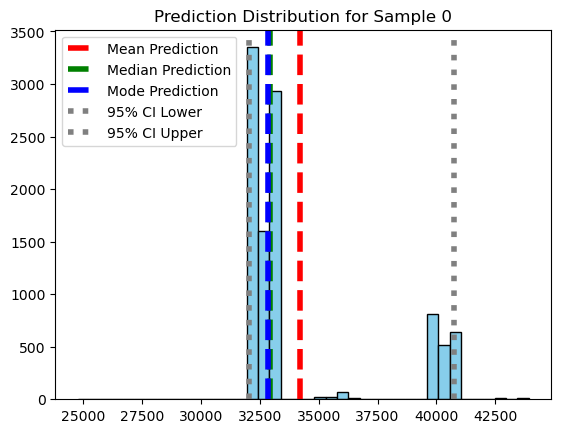

In [210]:
plt.hist(all_preds[:, 0], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[0], color='red', linewidth=4, linestyle='--', label='Mean Prediction')
plt.axvline(median_pred[0], color='green', linewidth=4, linestyle='--', label='Median Prediction')
plt.axvline(mode_pred[0], color='blue', linewidth=4, linestyle='--', label='Mode Prediction')
plt.axvline(lower_pred[0], color='gray', linewidth=4, linestyle=':', label='95% CI Lower')
plt.axvline(upper_pred[0], color='gray', linewidth=4, linestyle=':', label='95% CI Upper')
plt.title('Prediction Distribution for Sample 0')
plt.legend()
plt.show()

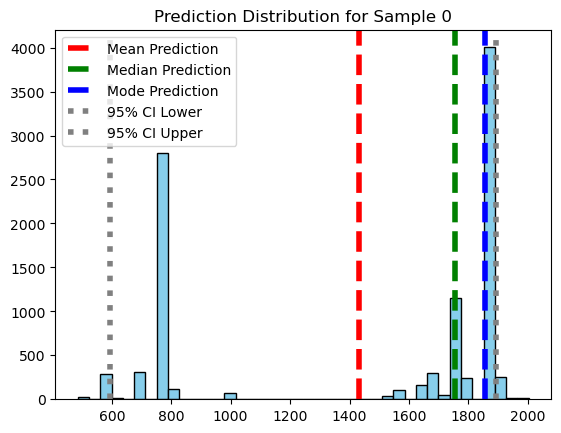

In [212]:
plt.hist(all_preds[:, 1], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[1], color='red', linewidth=4, linestyle='--', label='Mean Prediction')
plt.axvline(median_pred[1], color='green', linewidth=4, linestyle='--', label='Median Prediction')
plt.axvline(mode_pred[1], color='blue', linewidth=4, linestyle='--', label='Mode Prediction')
plt.axvline(lower_pred[1], color='gray', linewidth=4, linestyle=':', label='95% CI Lower')
plt.axvline(upper_pred[1], color='gray', linewidth=4, linestyle=':', label='95% CI Upper')
plt.title('Prediction Distribution for Sample 0')
plt.legend()
plt.show()

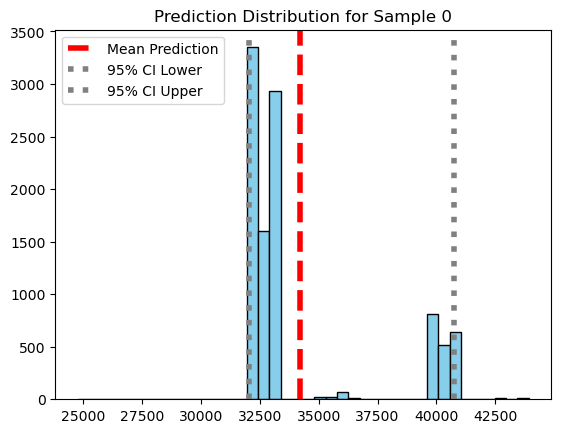

In [12]:
plt.hist(all_preds[:, 0], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[0], color='red', linewidth=4, linestyle='--', label='Mean Prediction')
plt.axvline(lower_pred[0], color='gray', linewidth=4, linestyle=':', label='95% CI Lower')
plt.axvline(upper_pred[0], color='gray', linewidth=4, linestyle=':', label='95% CI Upper')
plt.title('Prediction Distribution for Sample 0')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本0.png


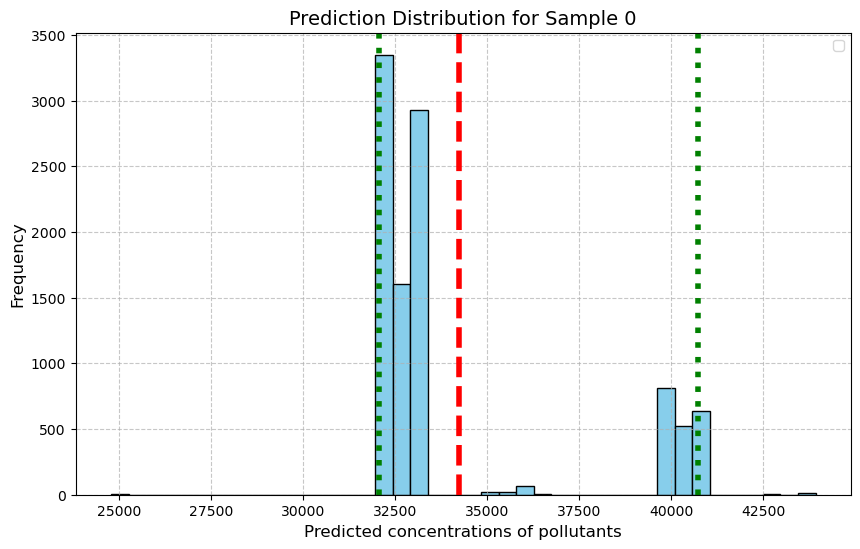

In [13]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本0.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 0], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[0], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[0], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[0], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 0', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本1.png


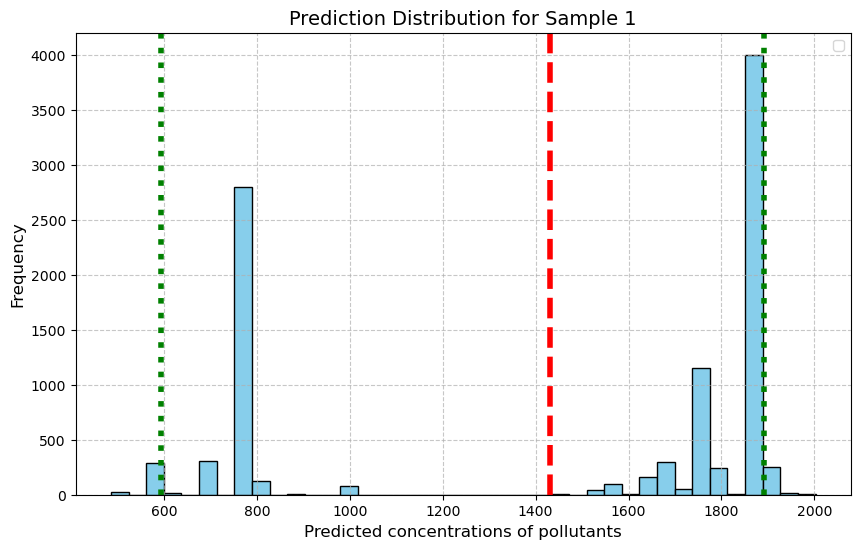

In [14]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本1.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 1], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[1], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[1], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[1], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 1', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本2.png


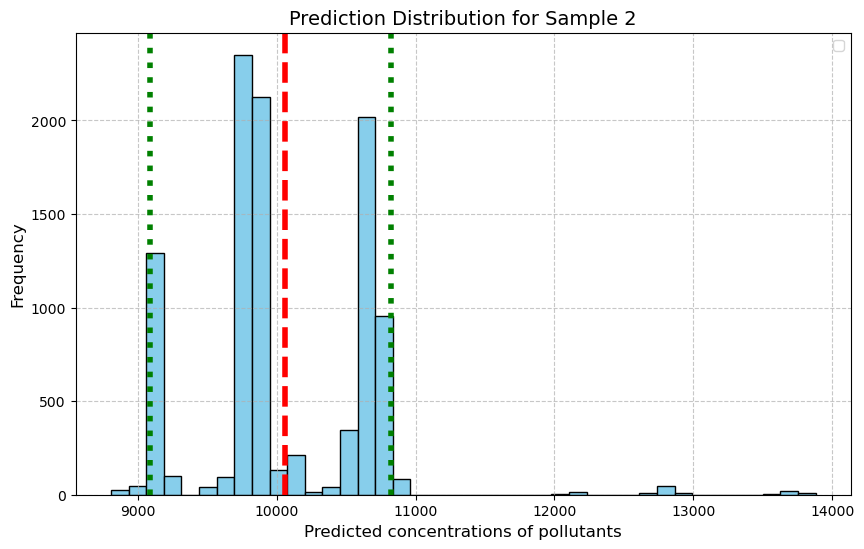

In [15]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本2.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 2], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[2], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[2], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[2], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 2', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本3.png


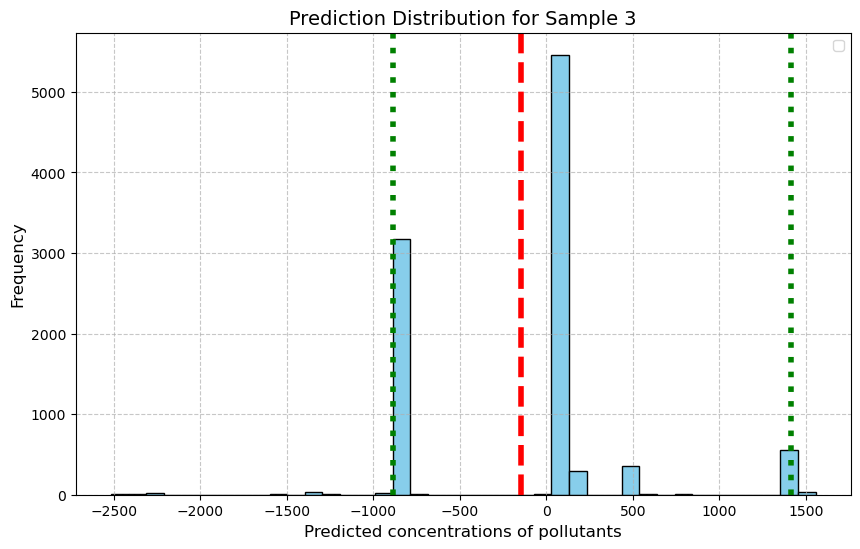

In [16]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本3.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 3], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[3], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[3], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[3], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 3', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本4.png


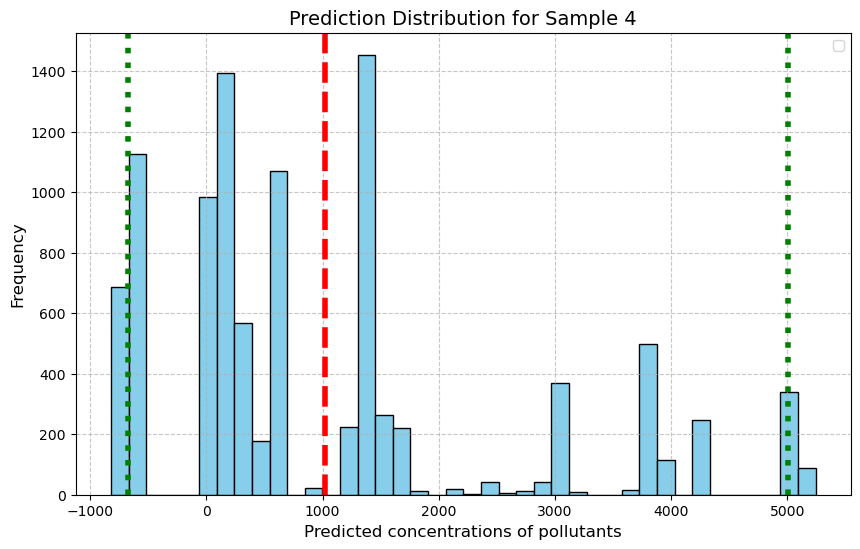

In [17]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本4.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 4], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[4], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[4], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[4], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 4', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本5.png


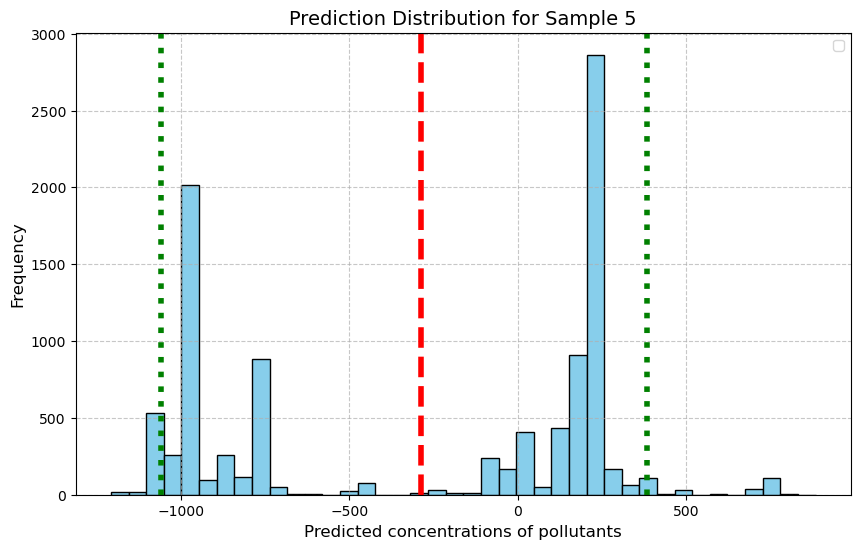

In [18]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本5.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 5], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[5], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[5], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[5], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 5', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本6.png


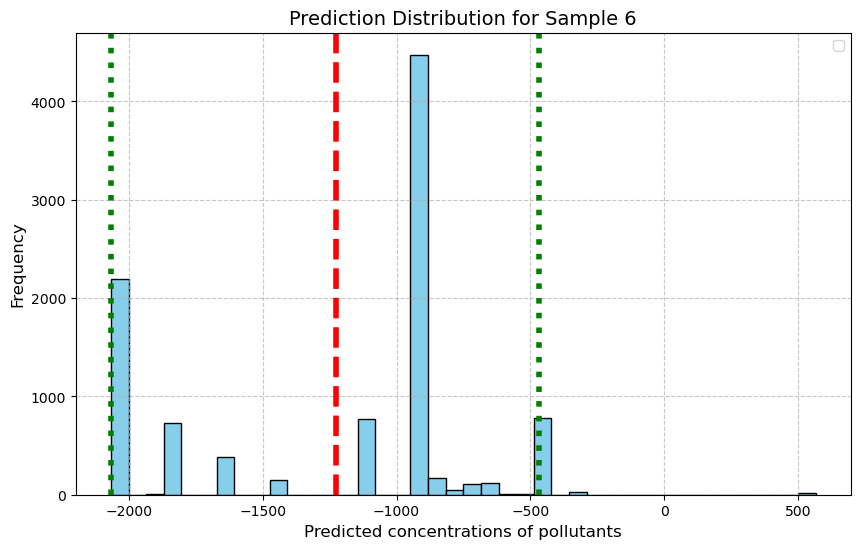

In [19]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本6.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 6], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[6], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[6], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[6], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 6', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本7.png


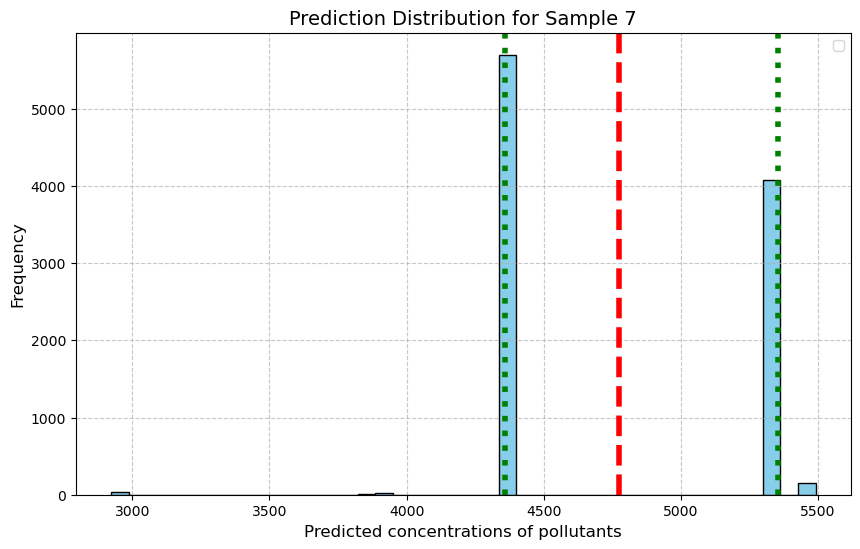

In [20]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本7.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 7], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[7], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[7], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[7], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 7', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本8.png


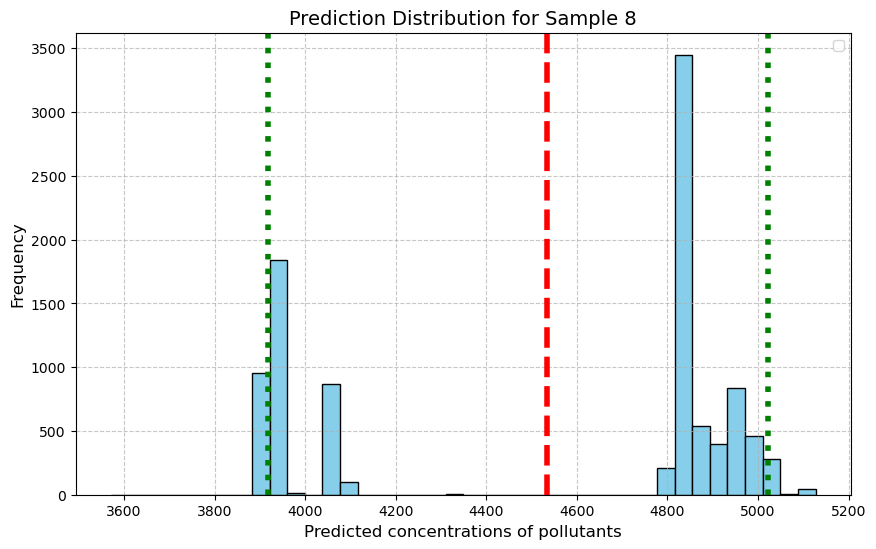

In [21]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本8.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 8], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[8], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[8], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[8], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 8', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本9.png


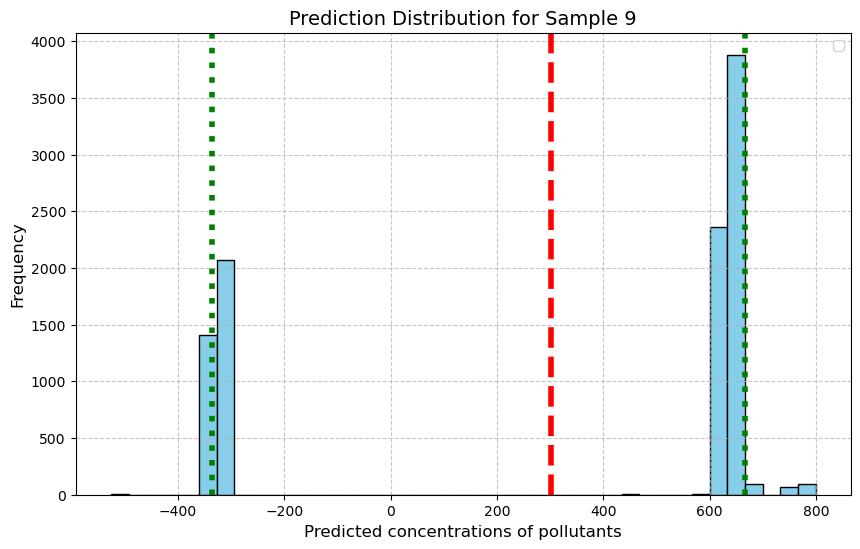

In [22]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本9.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 9], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[9], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[9], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[9], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 9', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本10.png


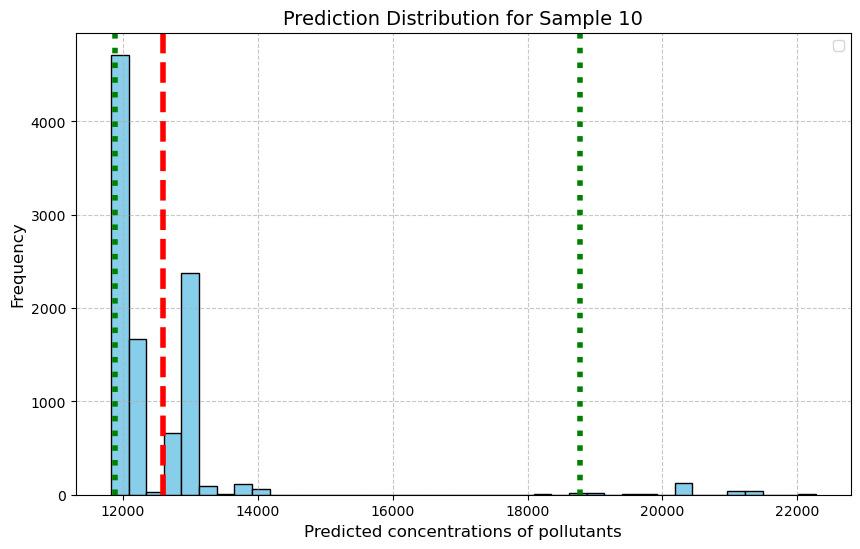

In [23]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本10.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 10], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[10], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[10], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[10], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 10', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本11.png


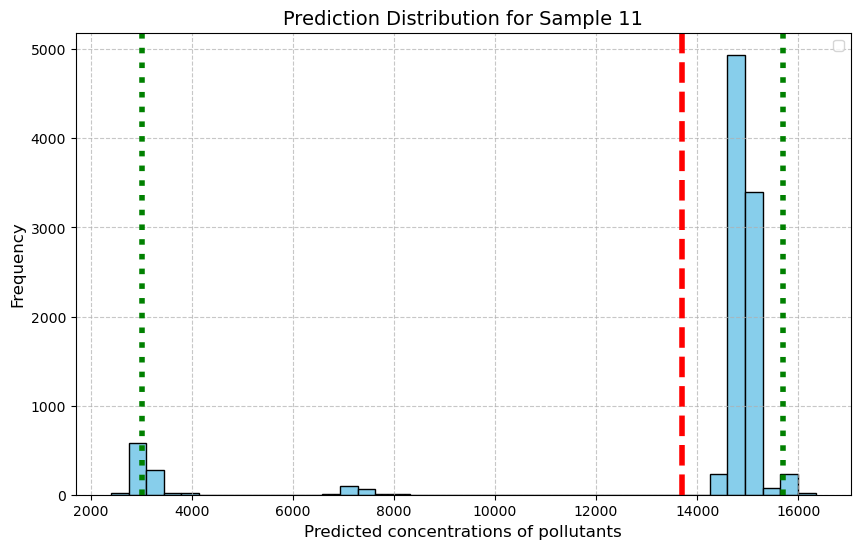

In [24]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本11.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 11], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[11], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[11], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[11], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 11', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本12.png


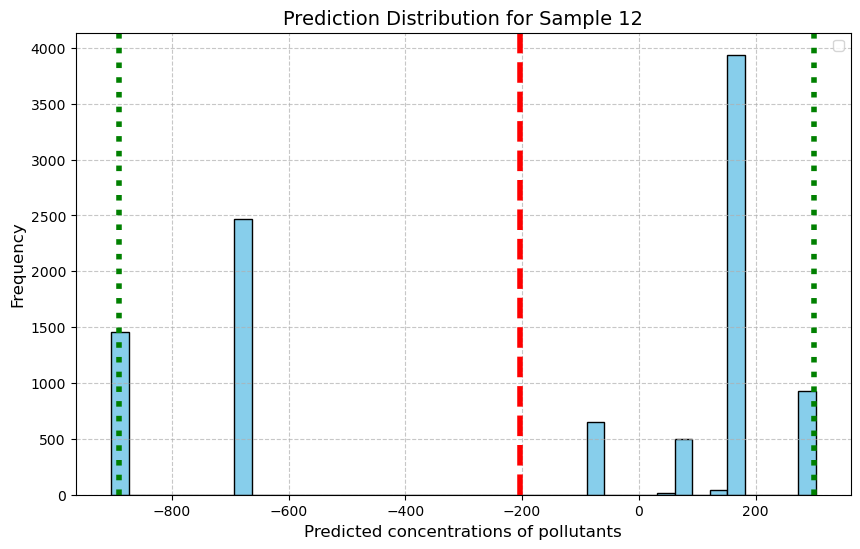

In [25]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本12.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 12], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[12], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[12], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[12], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 12', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本13.png


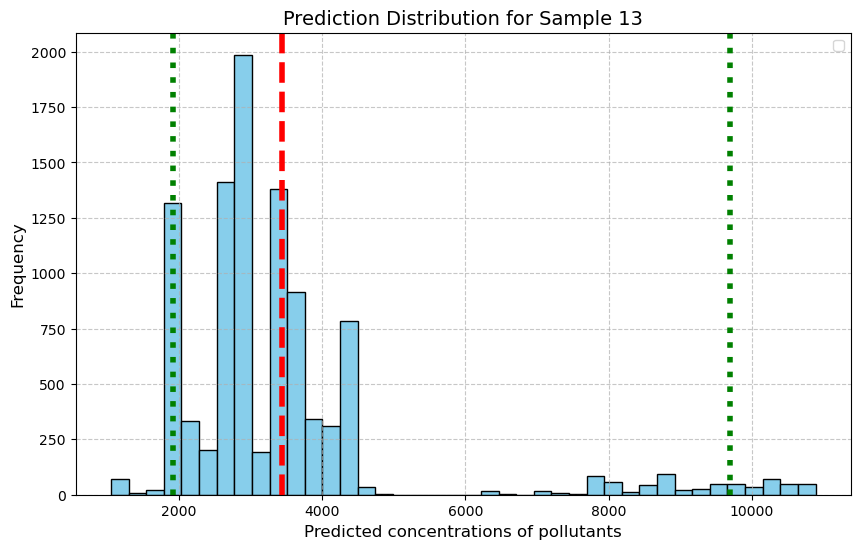

In [26]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本13.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 13], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[13], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[13], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[13], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 13', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本14.png


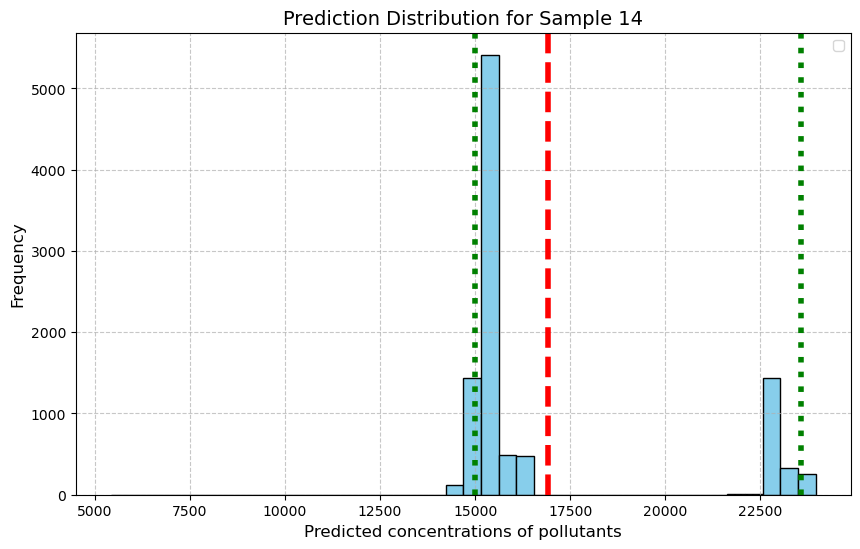

In [27]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本14.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 14], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[14], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[14], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[14], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 14', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本15.png


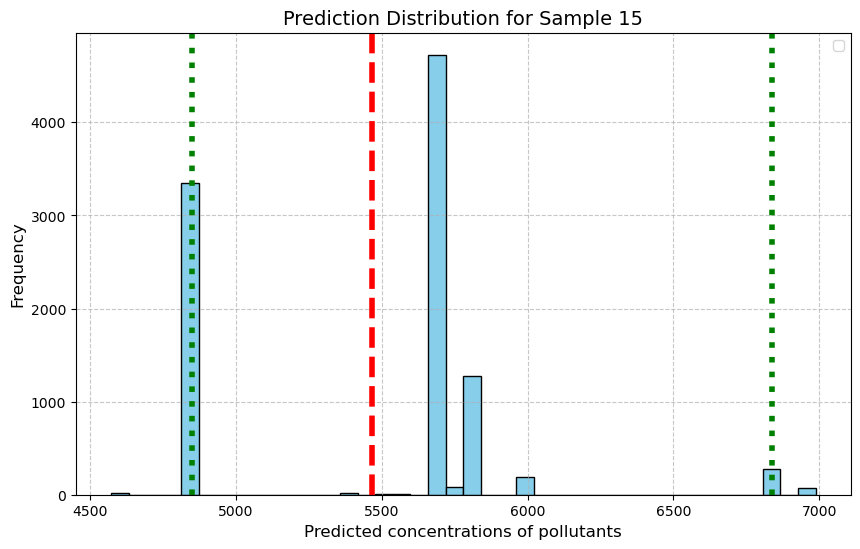

In [28]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本15.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 15], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[15], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[15], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[15], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 15', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本16.png


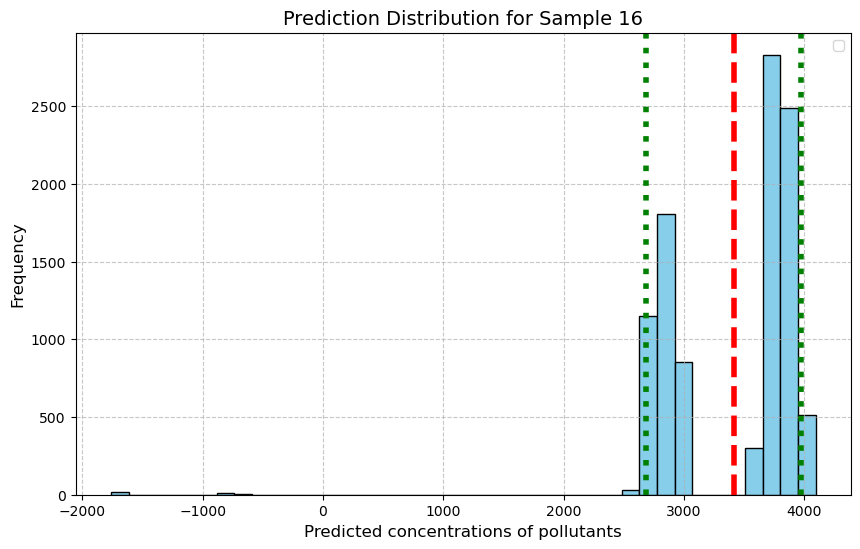

In [29]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本16.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 16], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[16], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[16], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[16], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 16', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本17.png


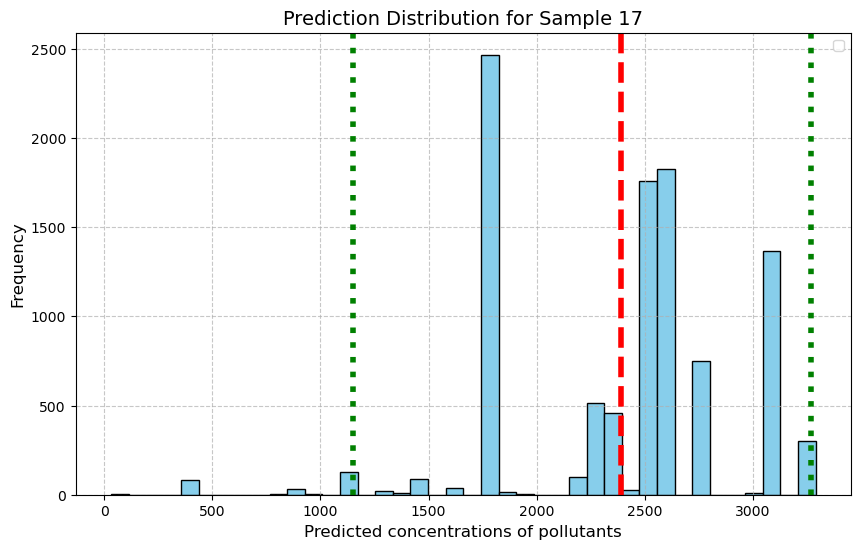

In [30]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本17.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 17], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[17], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[17], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[17], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 17', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本18.png


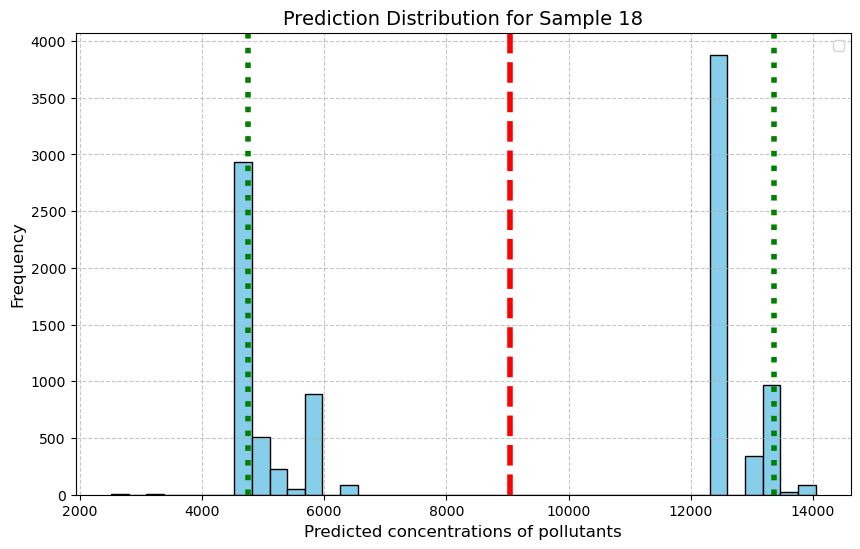

In [31]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本18.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 18], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[18], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[18], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[18], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 18', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本19.png


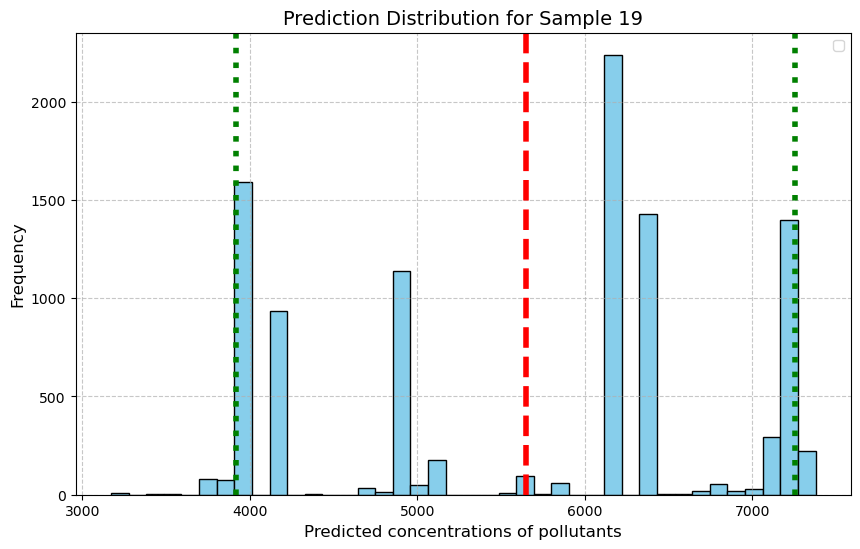

In [32]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本19.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 19], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[19], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[19], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[19], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 19', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本20.png


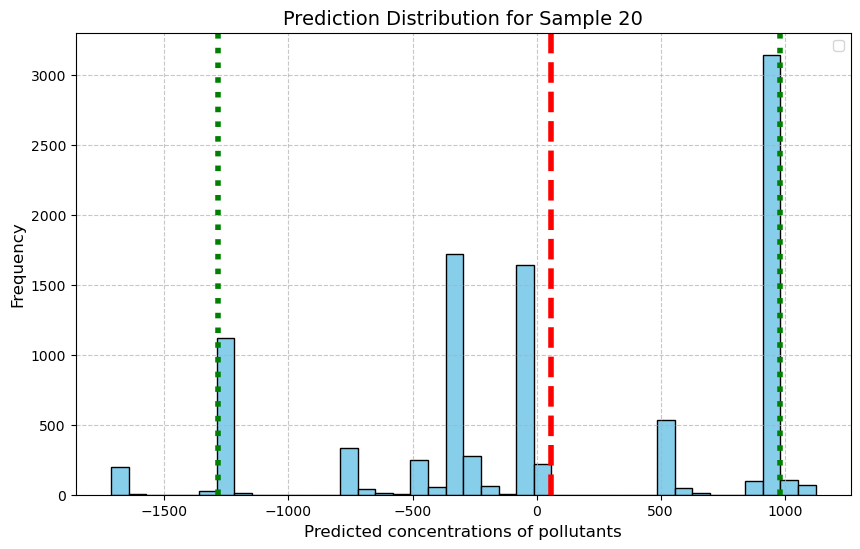

In [33]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本20.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 20], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[20], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[20], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[20], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 20', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本21.png


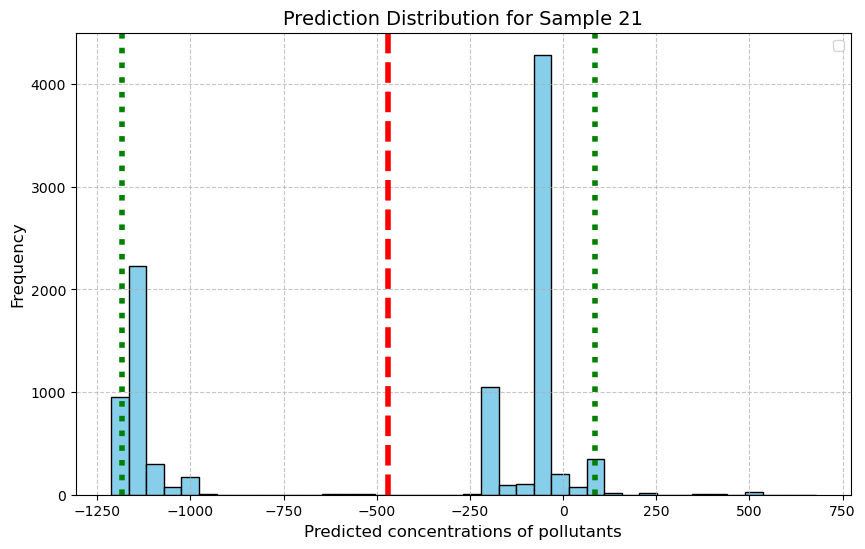

In [34]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本21.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 21], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[21], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[21], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[21], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 21', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本22.png


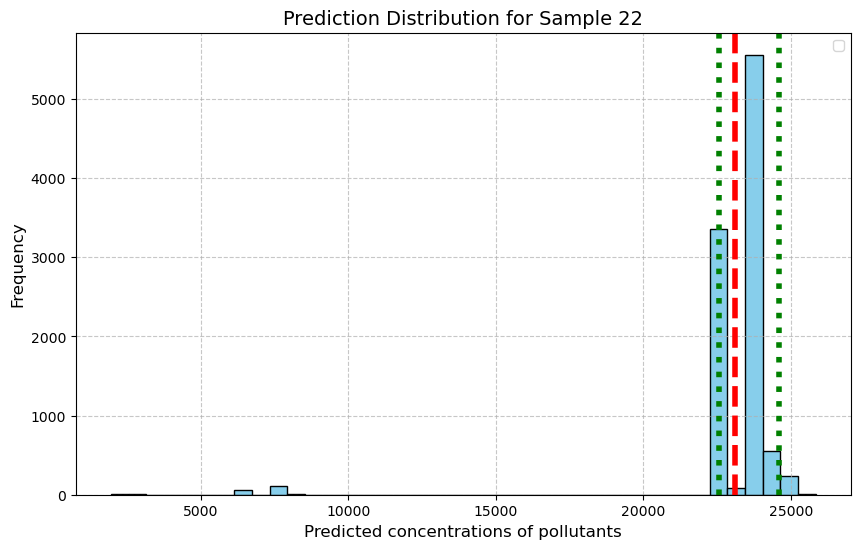

In [35]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本22.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 22], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[22], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[22], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[22], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 22', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本23.png


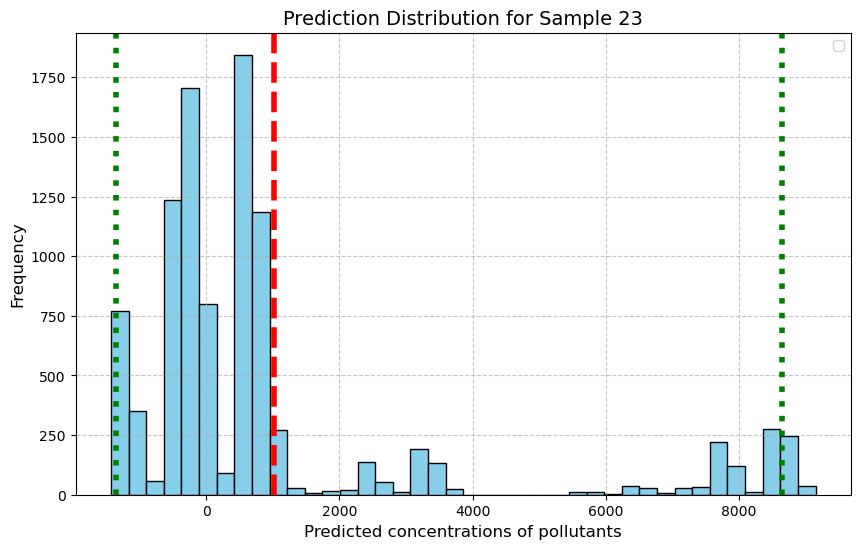

In [36]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本23.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 23], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[23], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[23], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[23], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 23', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本24.png


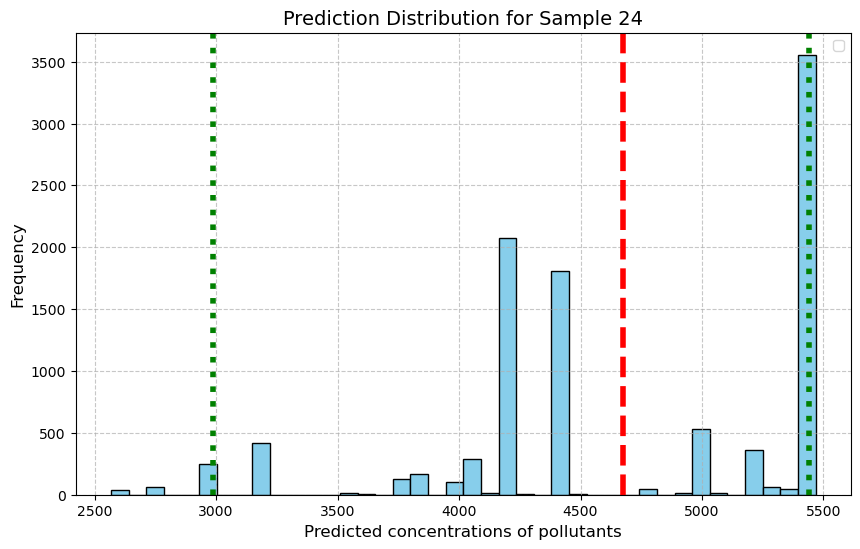

In [37]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本24.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 24], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[24], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[24], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[24], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 24', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本25.png


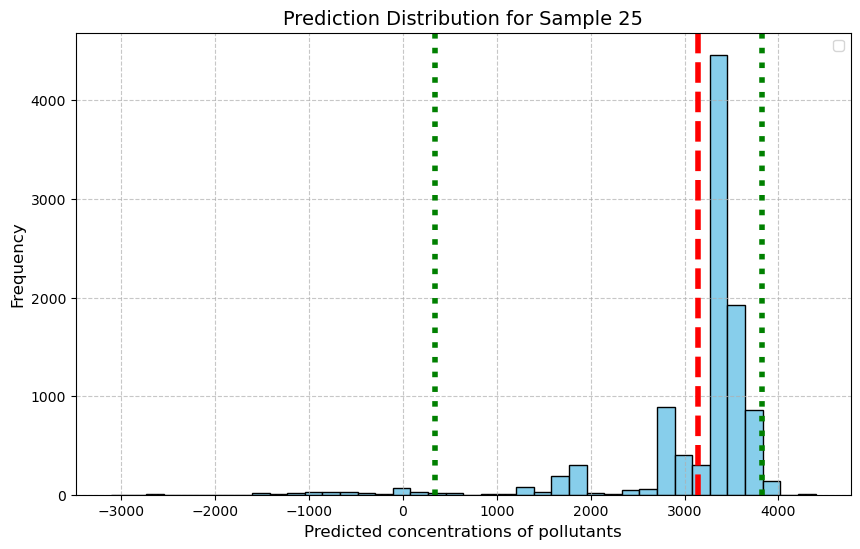

In [38]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本25.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 25], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[25], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[25], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[25], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 25', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本26.png


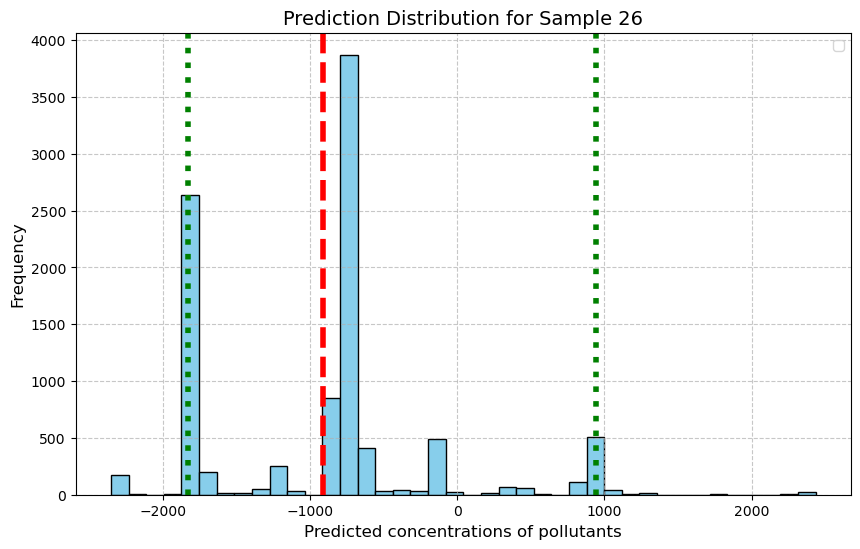

In [39]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本26.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 26], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[26], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[26], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[26], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 26', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本27.png


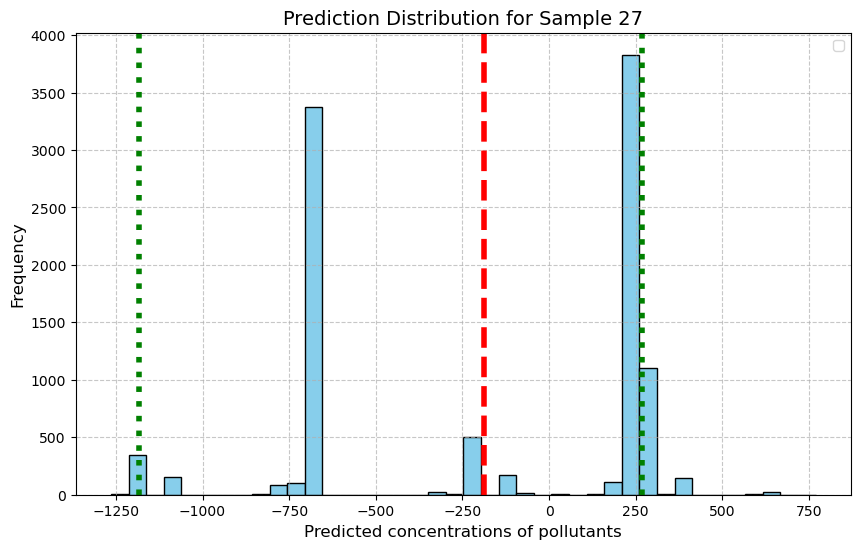

In [40]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本27.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 27], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[27], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[27], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[27], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 27', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本28.png


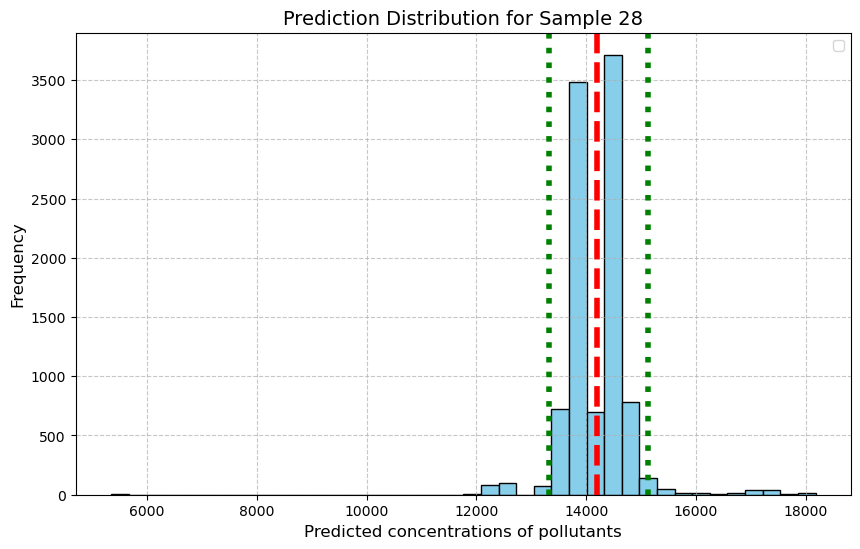

In [41]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本28.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 28], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[28], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[28], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[28], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 28', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本29.png


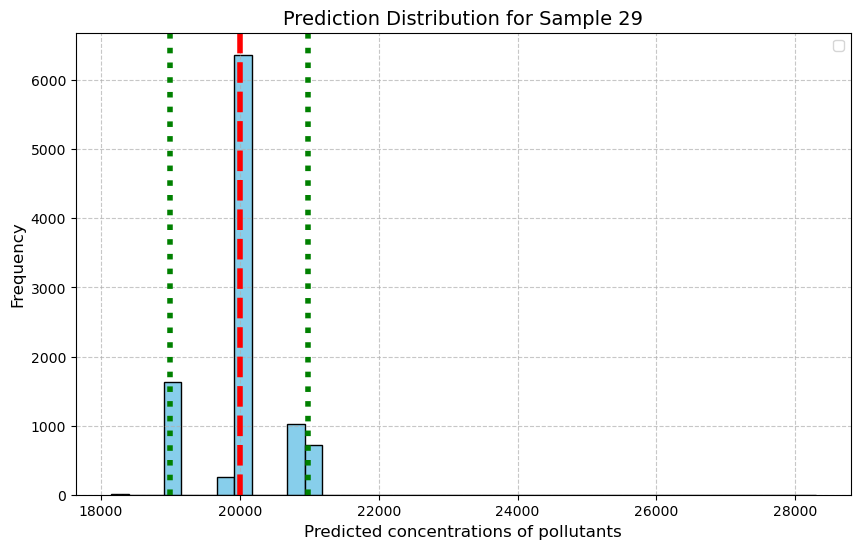

In [42]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本29.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 29], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[29], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[29], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[29], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 29', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本30.png


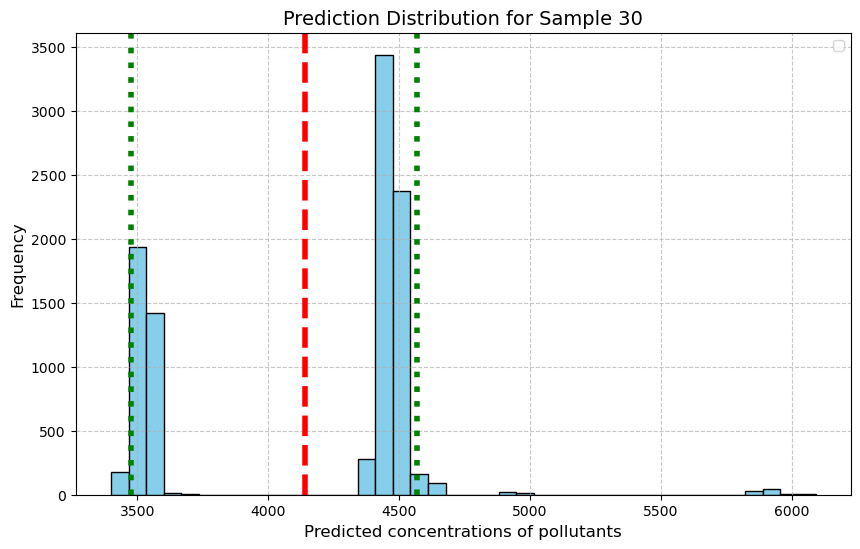

In [43]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本30.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 30], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[30], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[30], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[30], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 30', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本31.png


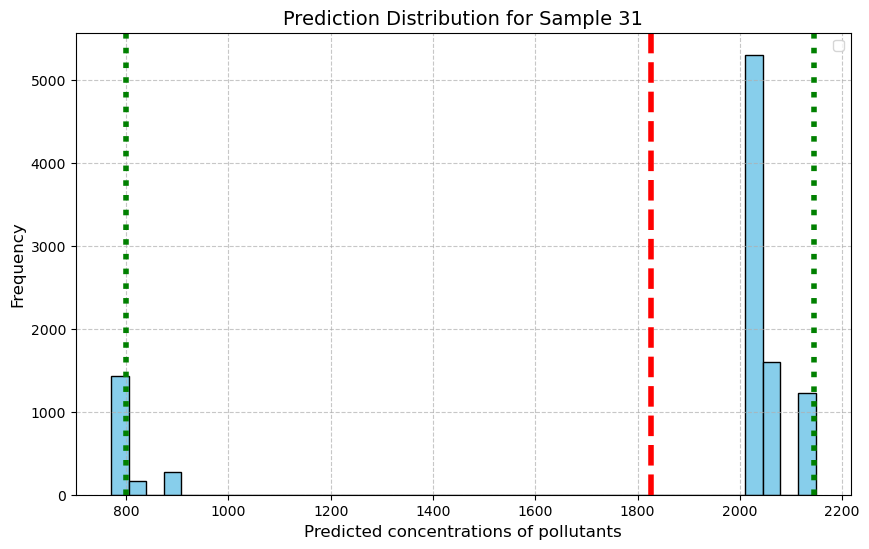

In [44]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本31.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 31], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[31], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[31], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[31], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 31', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本32.png


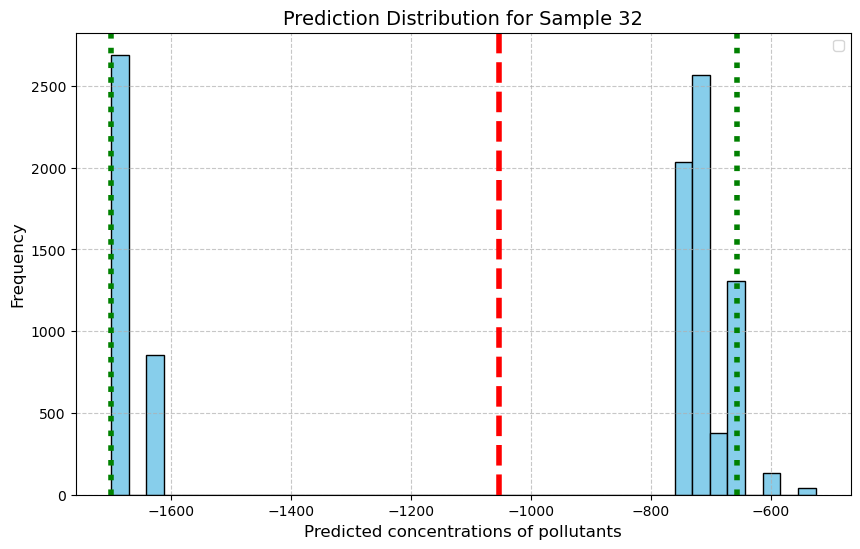

In [45]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本32.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 32], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[32], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[32], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[32], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 32', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本33.png


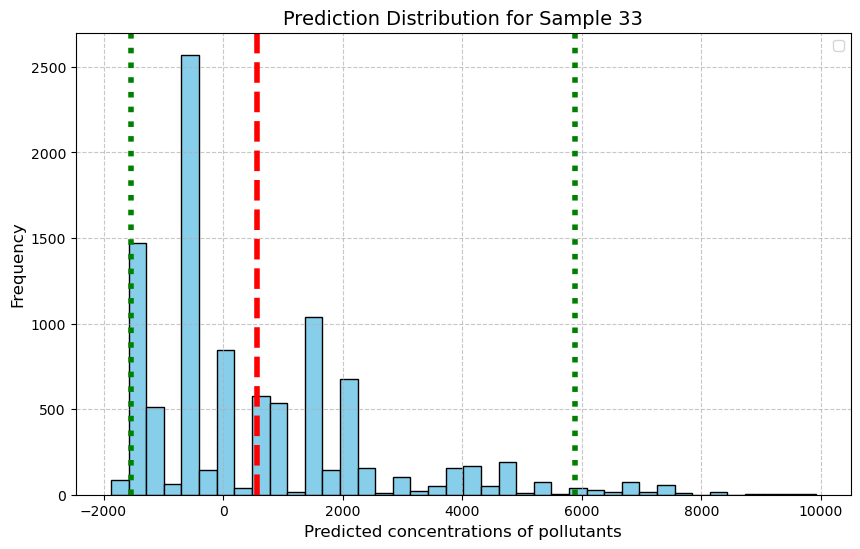

In [46]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本33.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 33], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[33], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[33], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[33], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 33', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本34.png


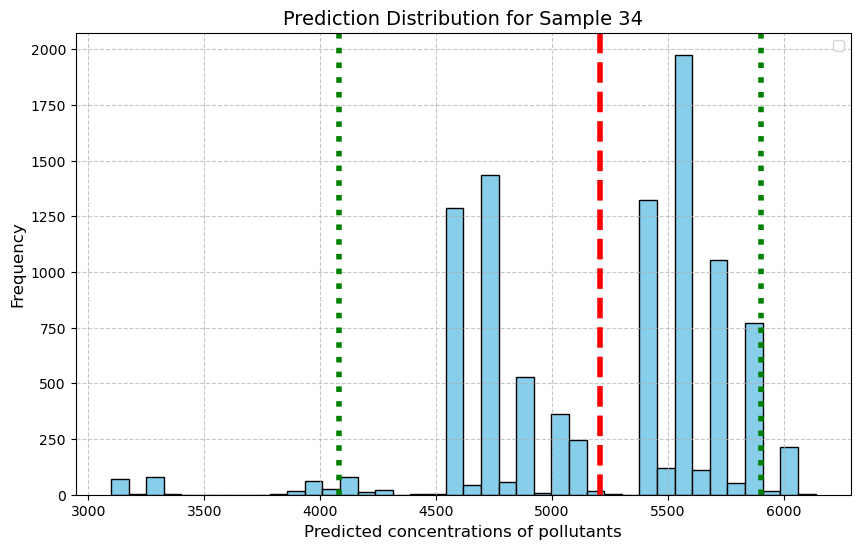

In [47]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本34.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 34], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[34], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[34], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[34], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 34', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本35.png


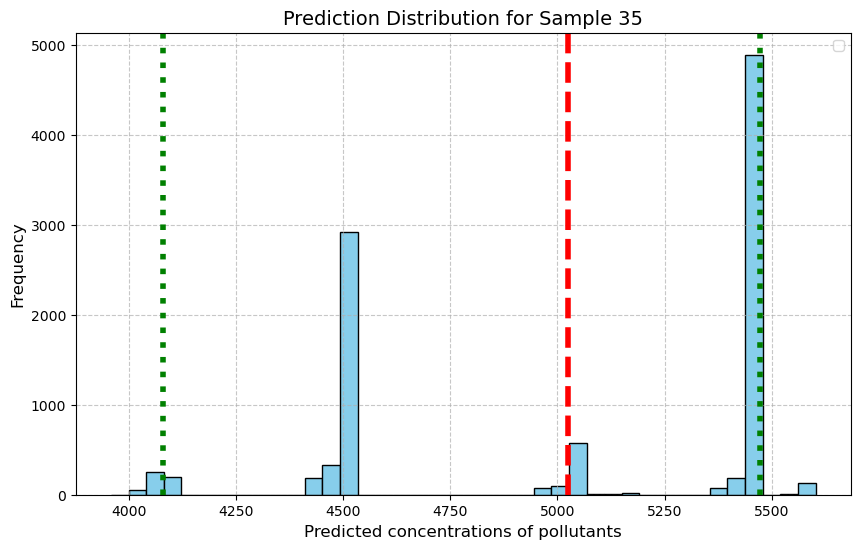

In [48]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本35.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 35], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[35], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[35], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[35], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 35', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本36.png


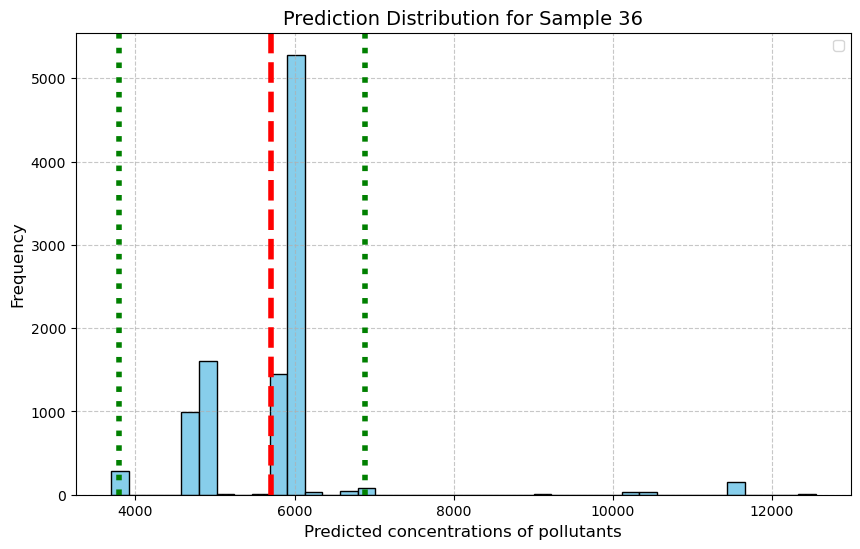

In [49]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本36.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 36], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[36], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[36], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[36], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 36', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本37.png


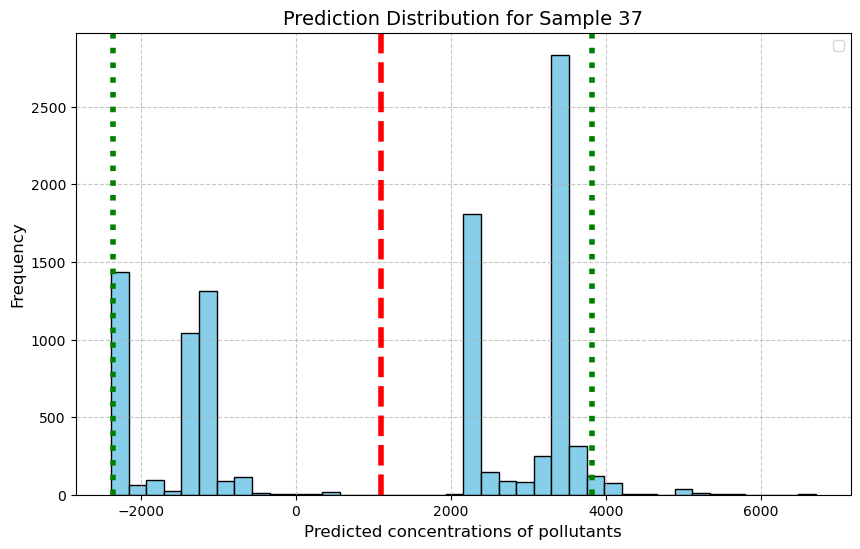

In [50]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本37.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 37], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[37], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[37], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[37], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 37', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本38.png


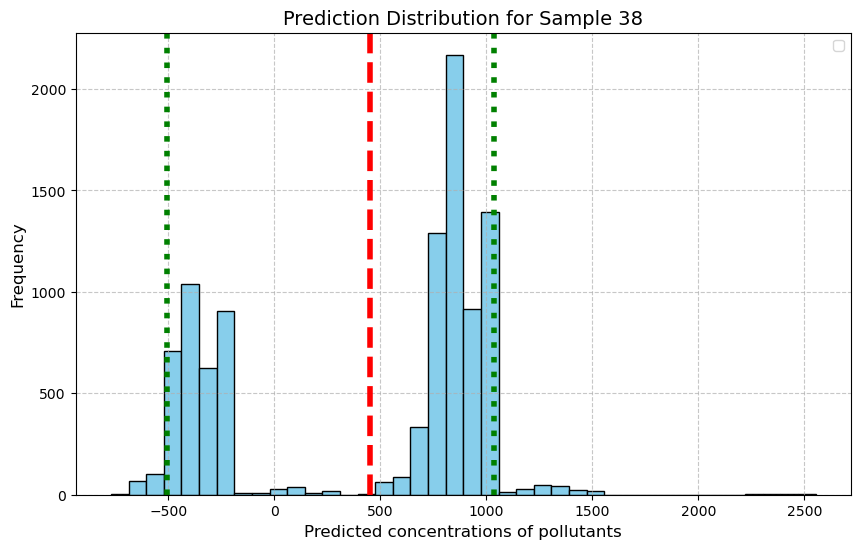

In [51]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本38.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 38], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[38], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[38], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[38], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 38', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本39.png


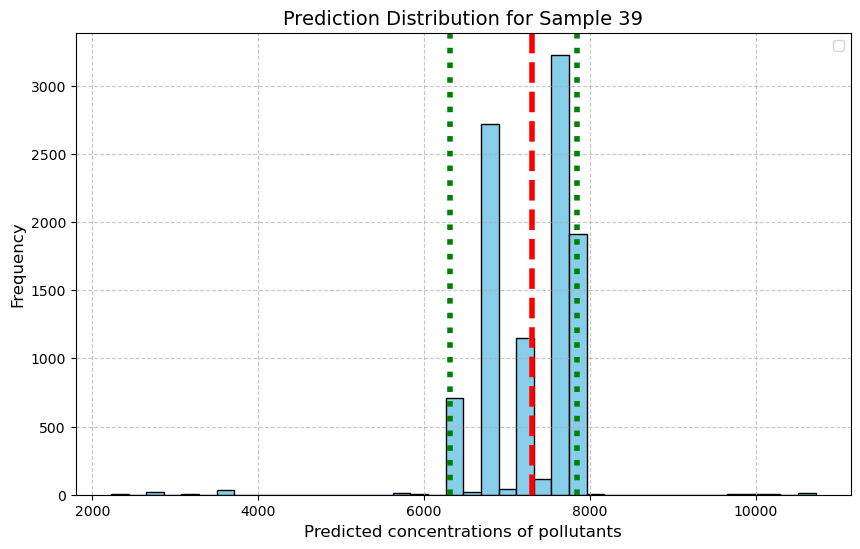

In [52]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本39.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 39], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[39], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[39], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[39], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 39', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本40.png


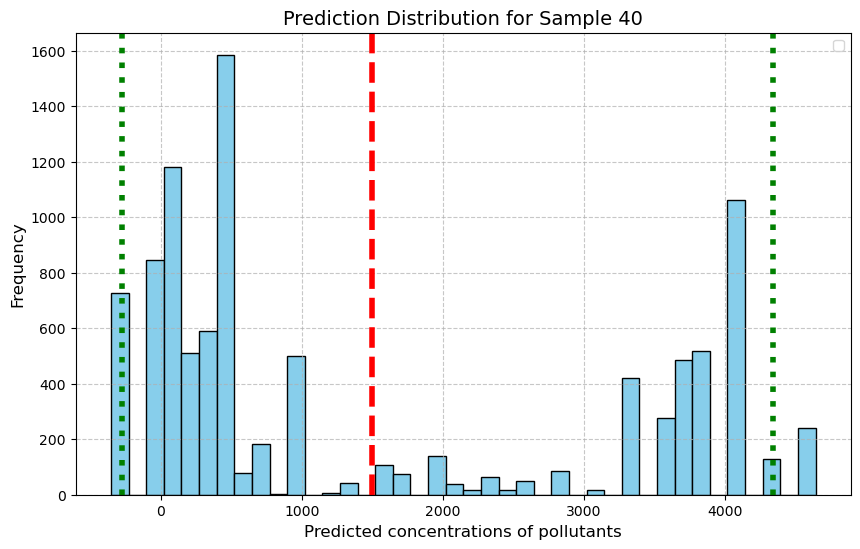

In [53]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本40.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 40], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[40], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[40], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[40], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 40', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本41.png


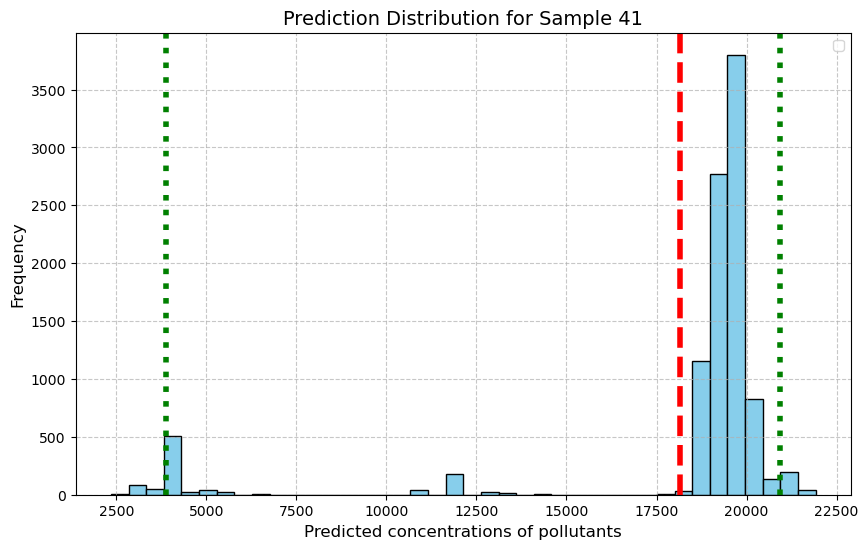

In [54]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本41.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 41], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[41], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[41], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[41], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 41', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本42.png


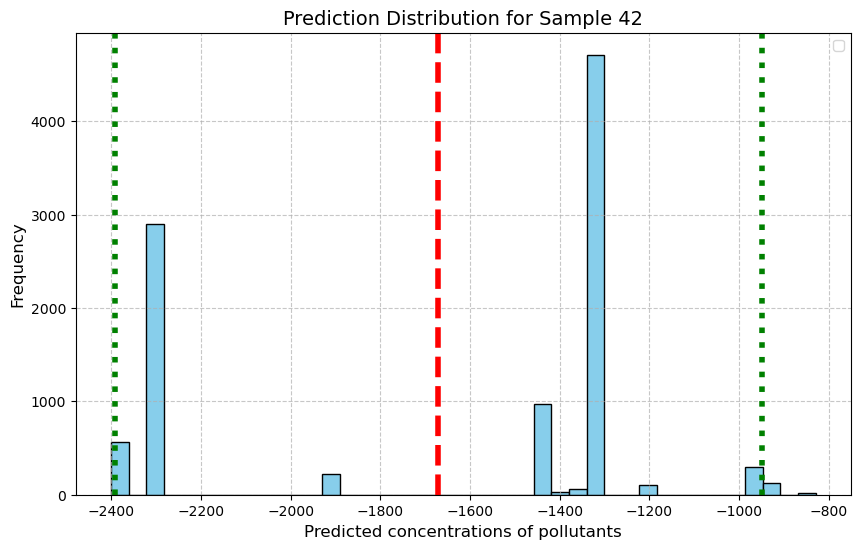

In [55]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本42.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 42], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[42], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[42], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[42], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 42', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本43.png


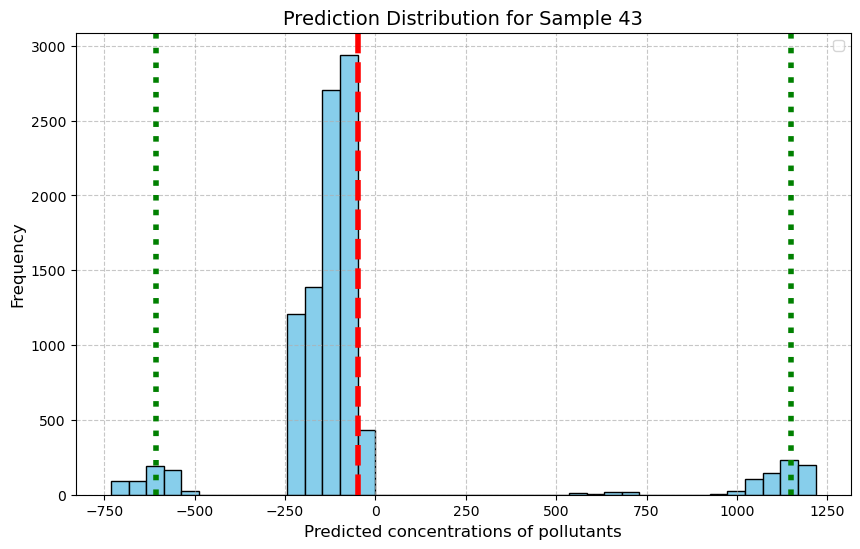

In [56]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本43.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 43], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[43], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[43], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[43], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 43', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本44.png


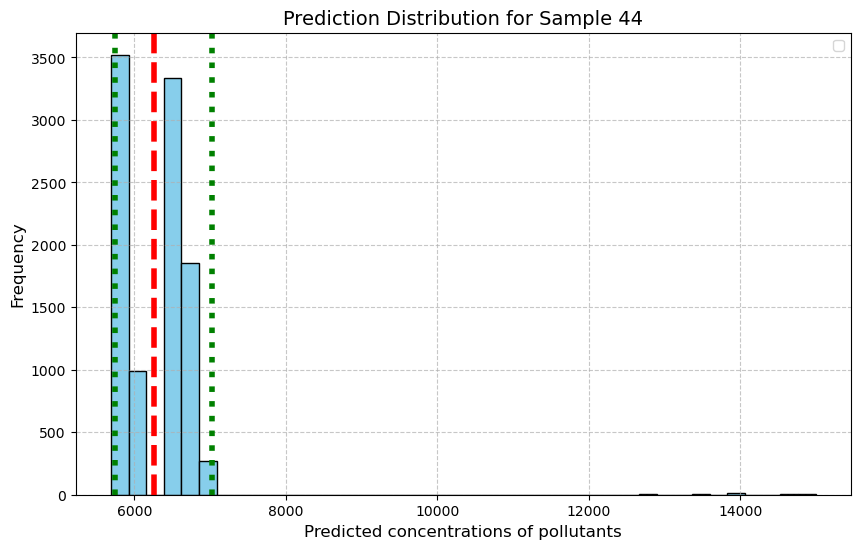

In [57]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本44.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 44], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[44], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[44], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[44], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 44', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本45.png


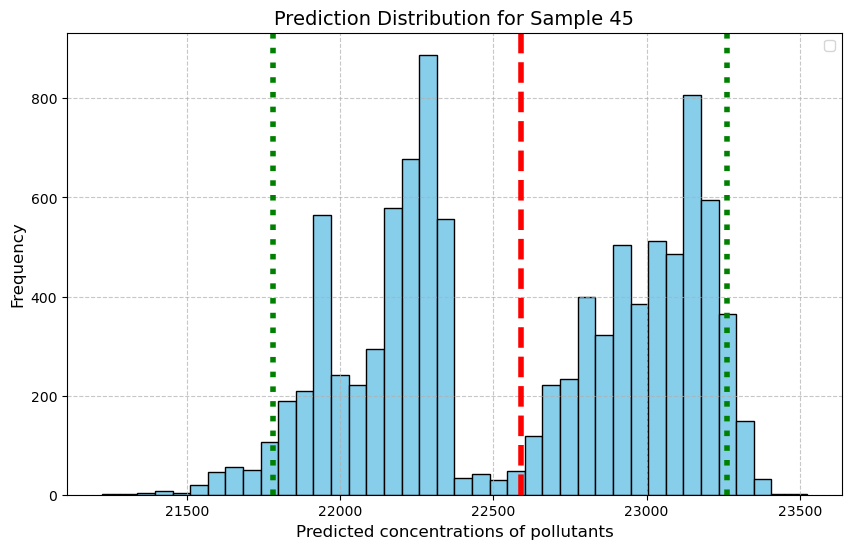

In [58]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本45.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 45], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[45], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[45], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[45], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 45', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本46.png


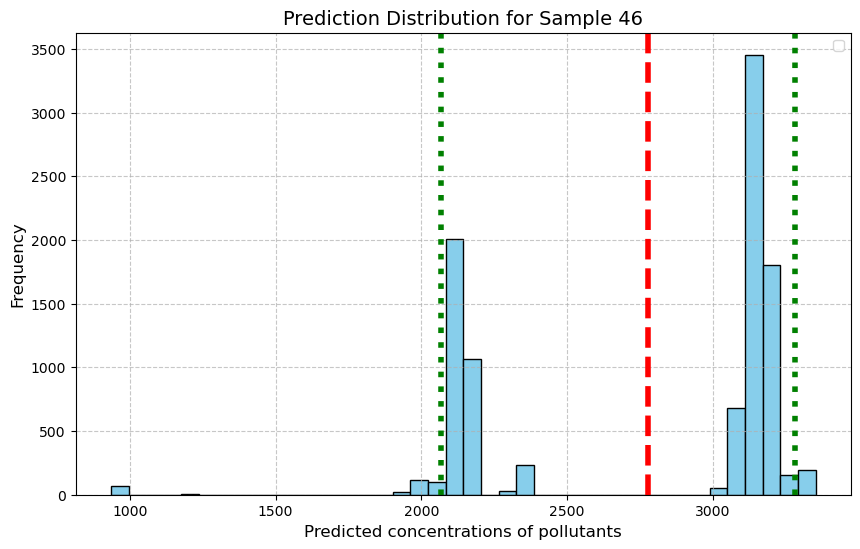

In [59]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本46.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 46], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[46], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[46], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[46], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 46', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本47.png


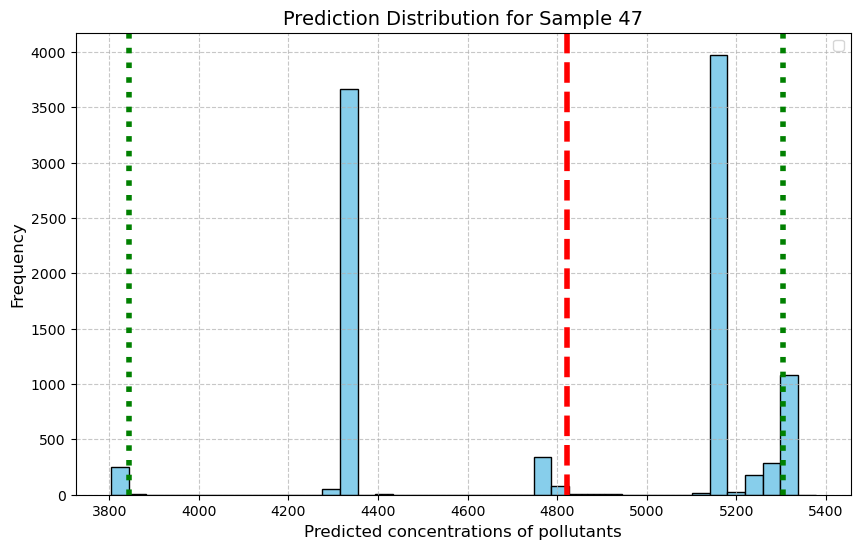

In [60]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本47.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 47], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[47], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[47], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[47], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 47', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本48.png


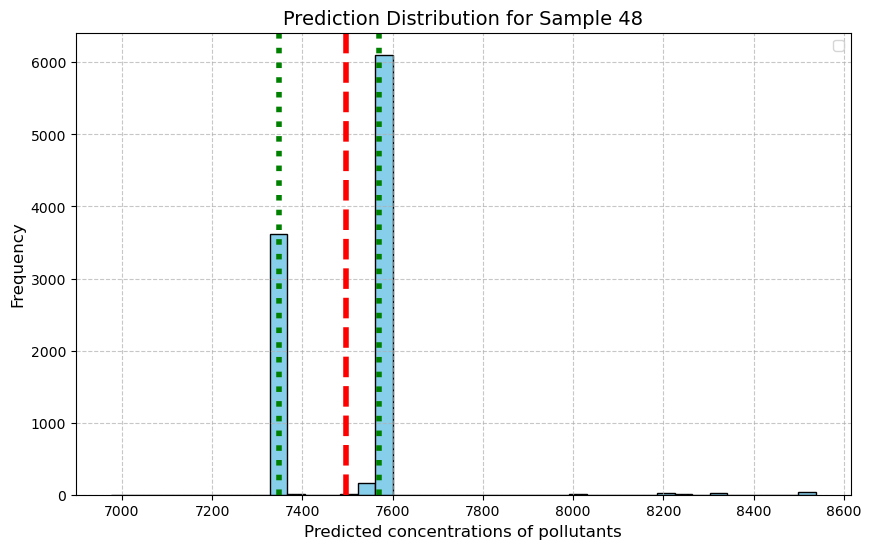

In [61]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本48.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 48], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[48], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[48], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[48], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 48', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本49.png


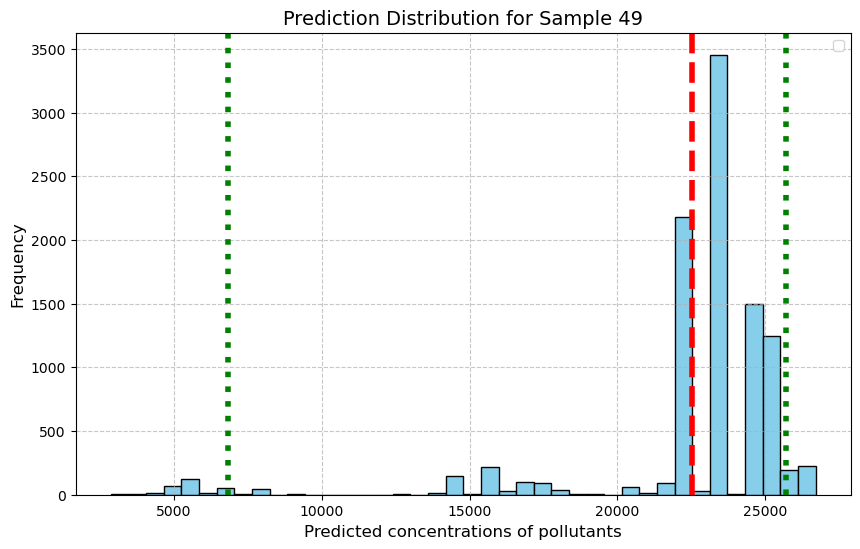

In [62]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本49.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 49], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[49], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[49], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[49], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 49', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本50.png


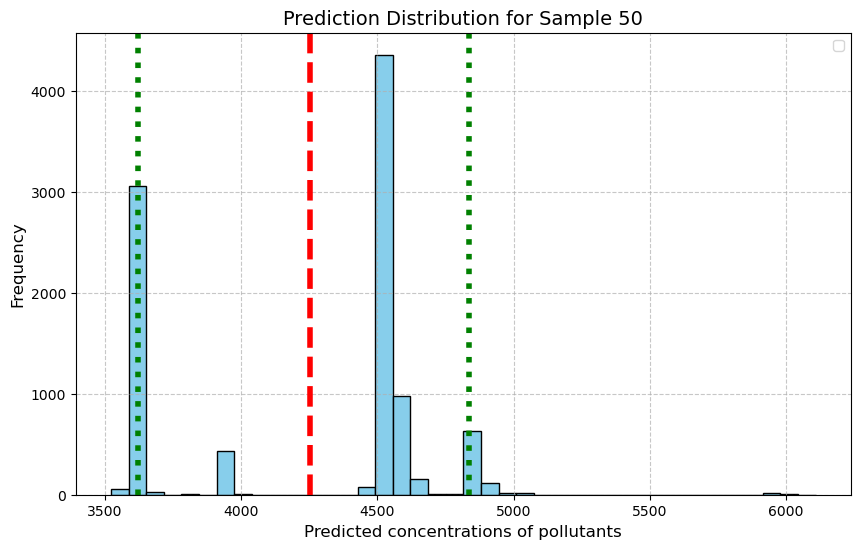

In [63]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本50.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 50], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[50], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[50], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[50], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 50', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本51.png


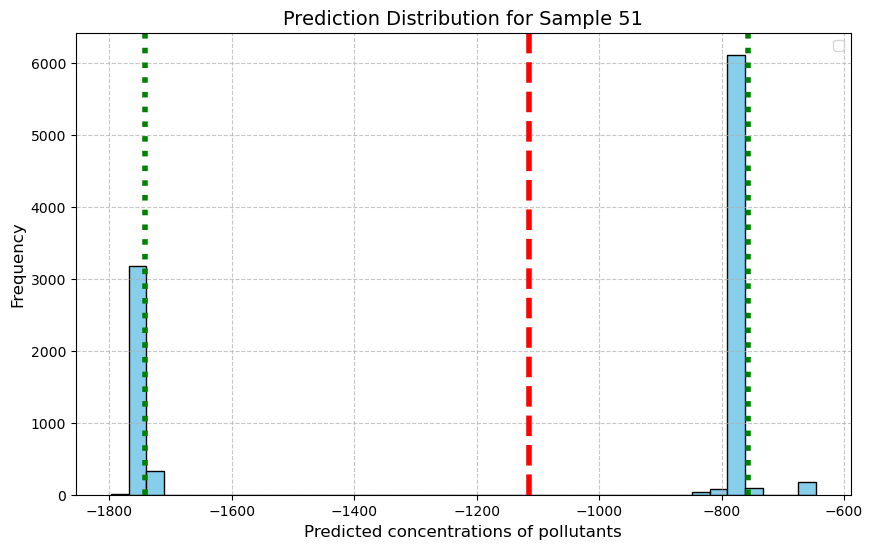

In [64]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本51.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 51], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[51], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[51], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[51], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 51', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本52.png


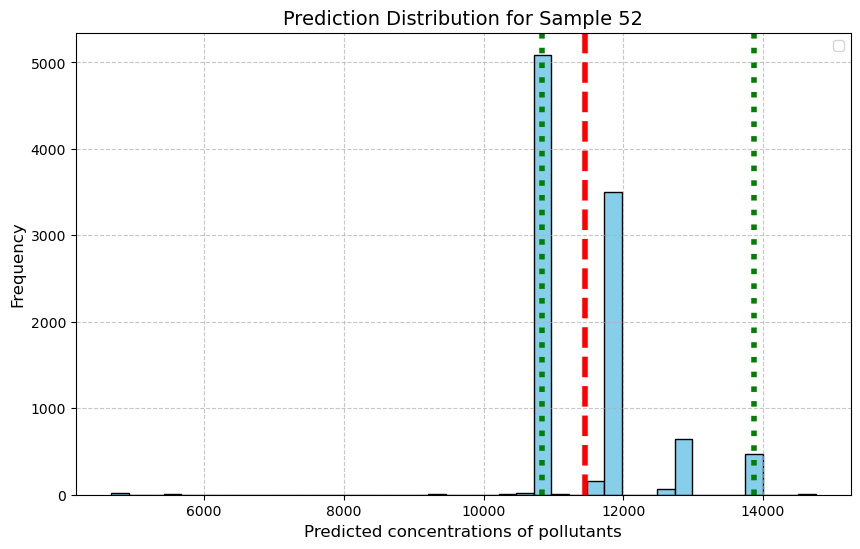

In [65]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本52.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 52], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[52], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[52], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[52], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 52', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本53.png


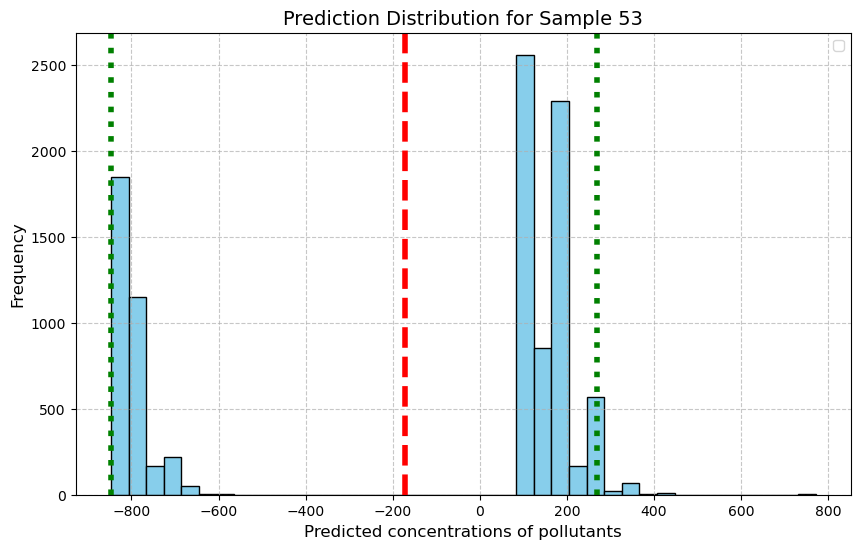

In [66]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本53.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 53], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[53], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[53], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[53], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 53', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本54.png


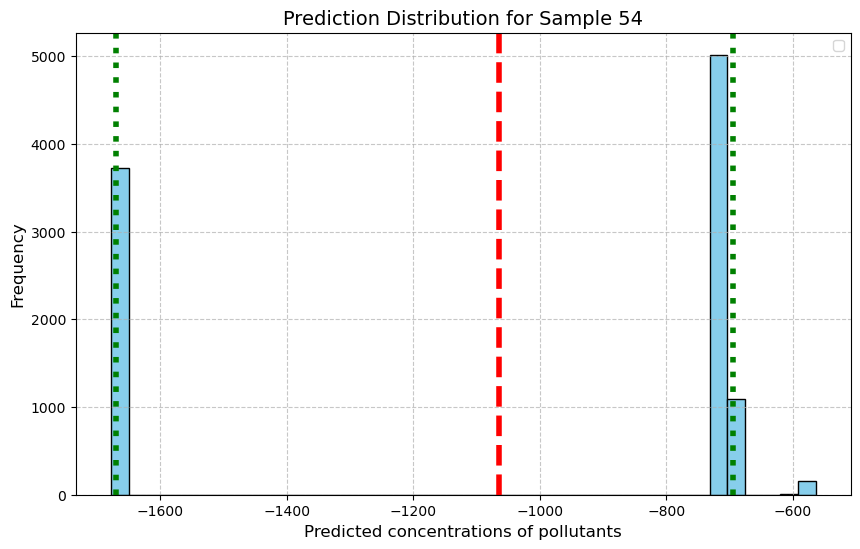

In [67]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本54.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 54], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[54], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[54], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[54], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 54', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本55.png


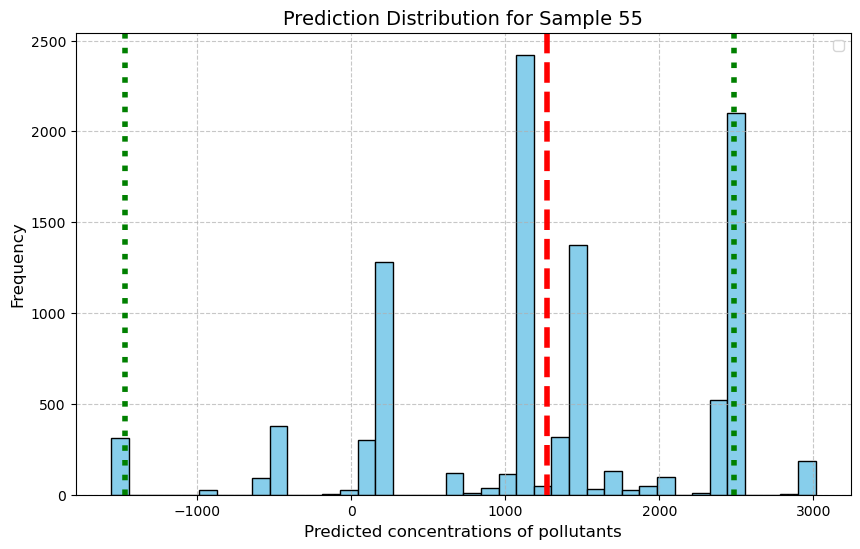

In [68]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本55.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 55], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[55], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[55], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[55], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 55', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本56.png


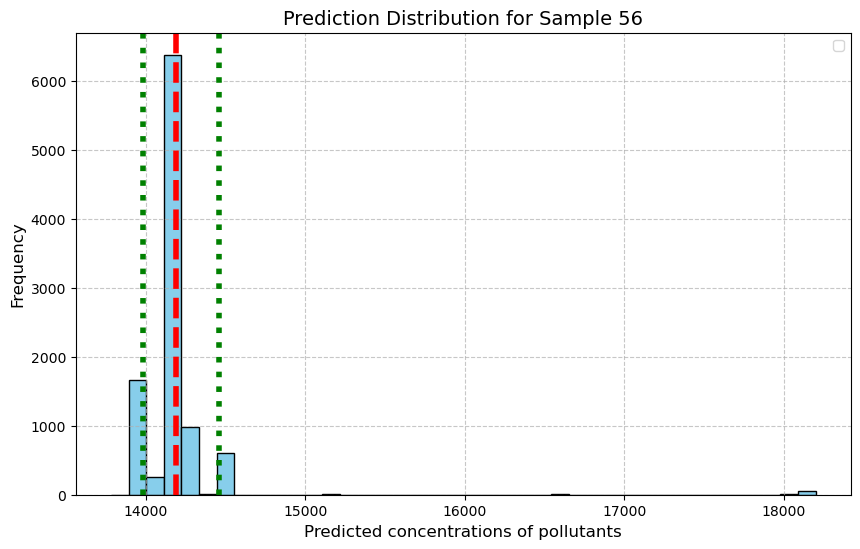

In [69]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本56.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 56], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[56], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[56], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[56], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 56', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本57.png


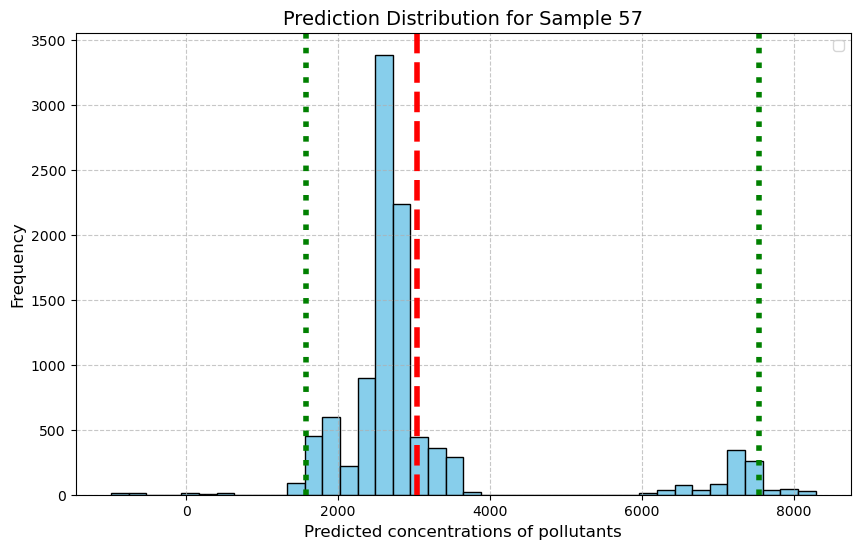

In [70]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本57.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 57], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[57], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[57], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[57], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 57', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本58.png


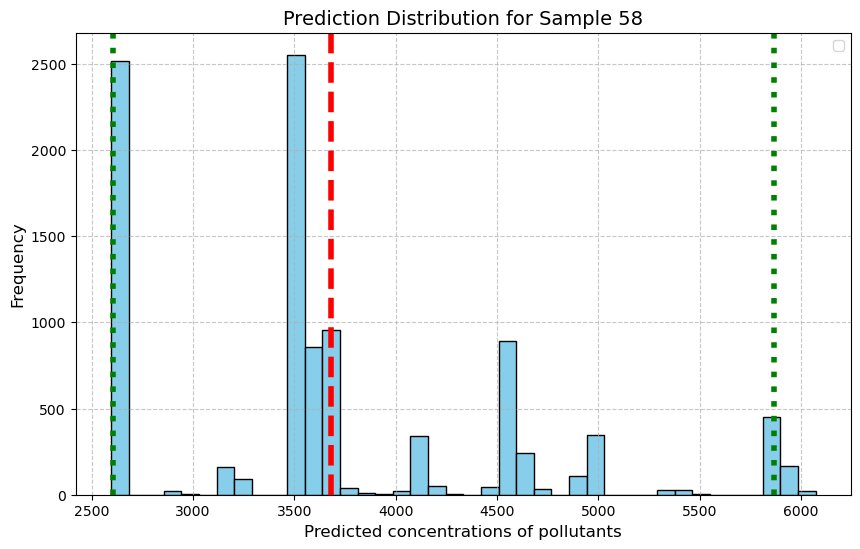

In [71]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本58.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 58], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[58], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[58], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[58], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 58', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本59.png


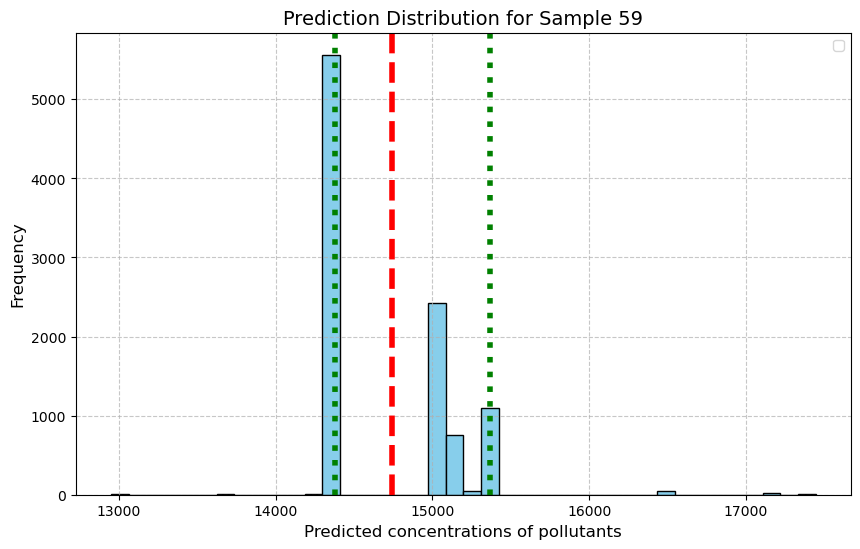

In [72]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本59.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 59], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[59], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[59], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[59], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 59', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本60.png


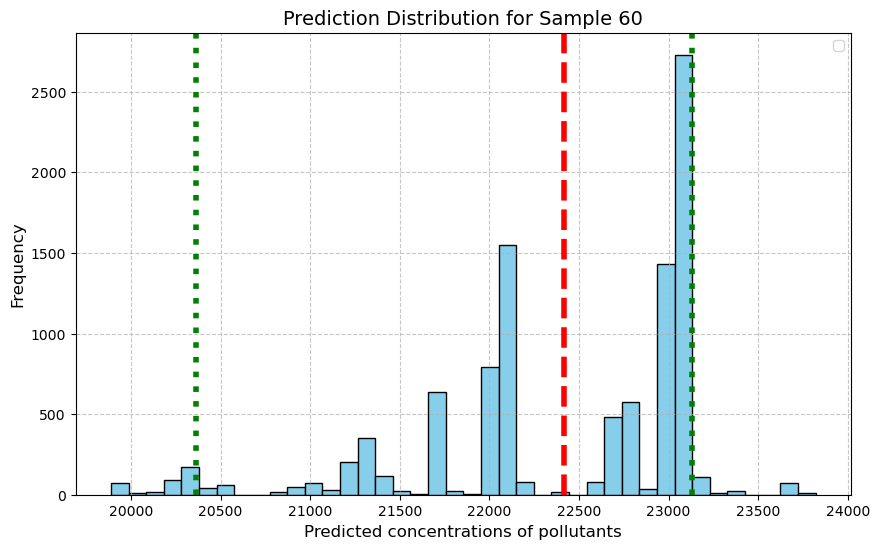

In [73]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本60.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 60], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[60], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[60], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[60], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 60', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本61.png


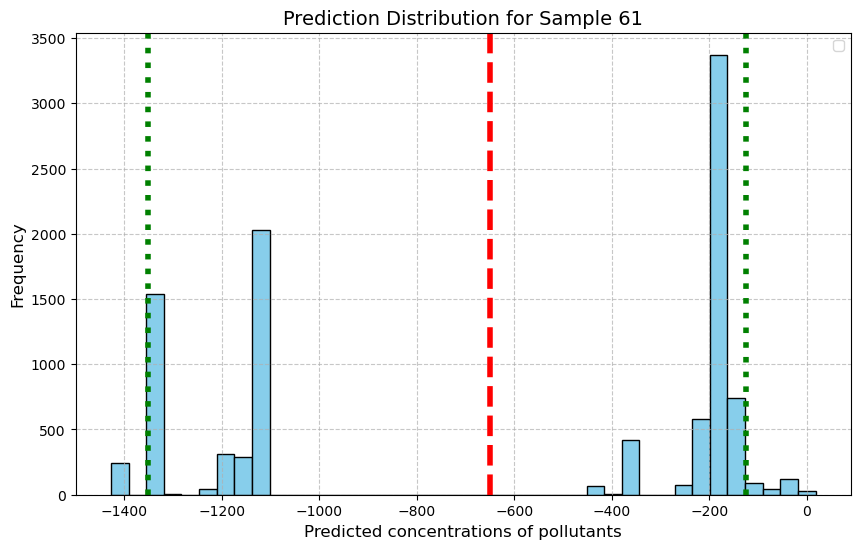

In [74]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本61.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 61], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[61], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[61], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[61], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 61', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本62.png


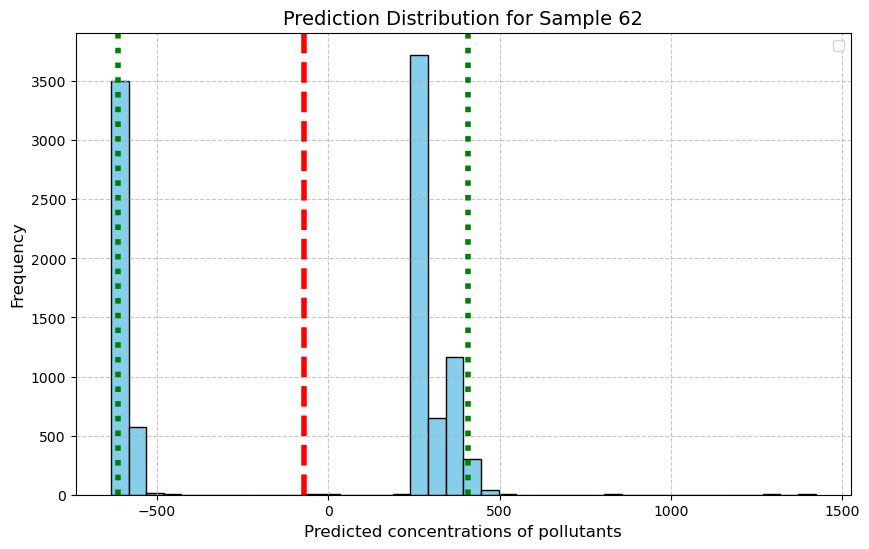

In [75]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本62.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 62], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[62], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[62], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[62], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 62', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本63.png


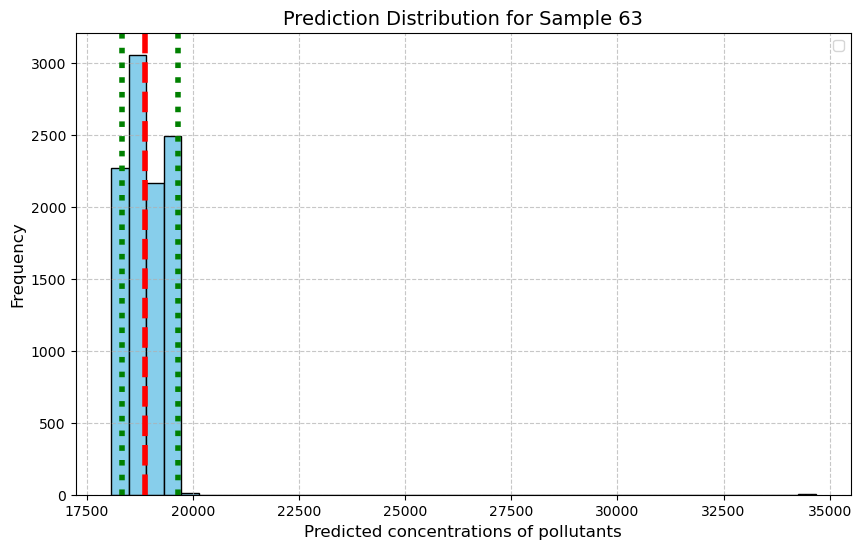

In [76]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本63.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 63], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[63], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[63], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[63], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 63', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本64.png


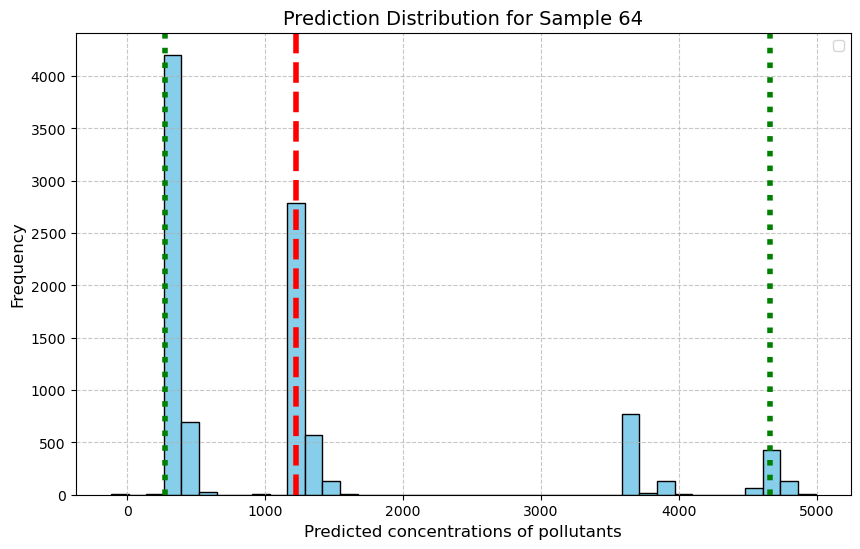

In [77]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本64.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 64], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[64], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[64], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[64], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 64', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本65.png


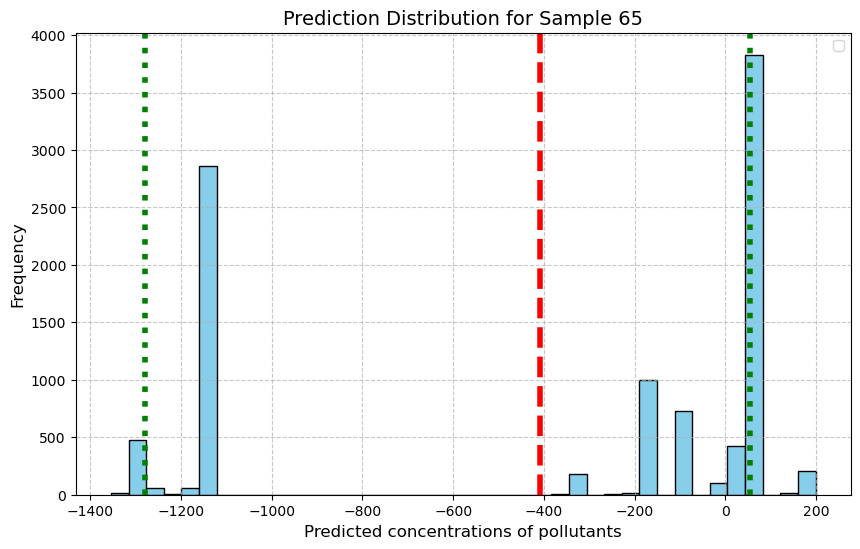

In [78]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本65.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 65], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[65], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[65], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[65], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 65', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本66.png


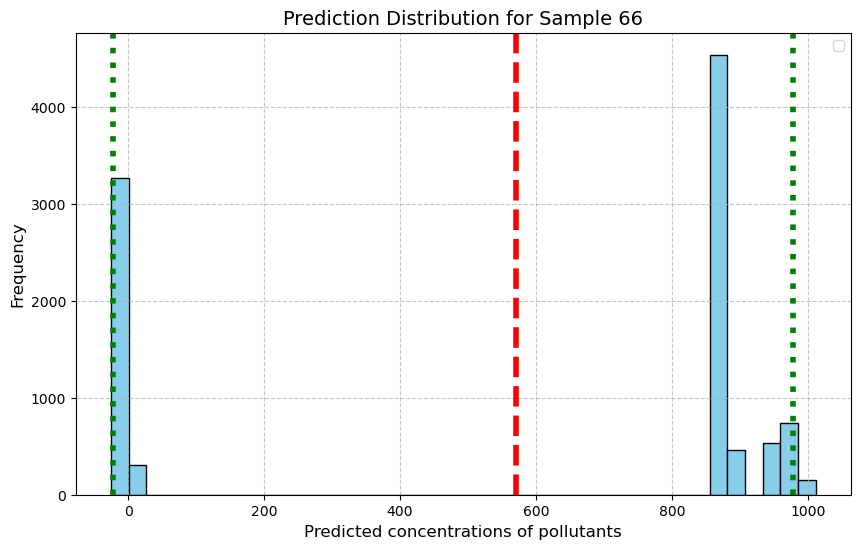

In [79]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本66.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 66], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[66], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[66], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[66], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 66', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本67.png


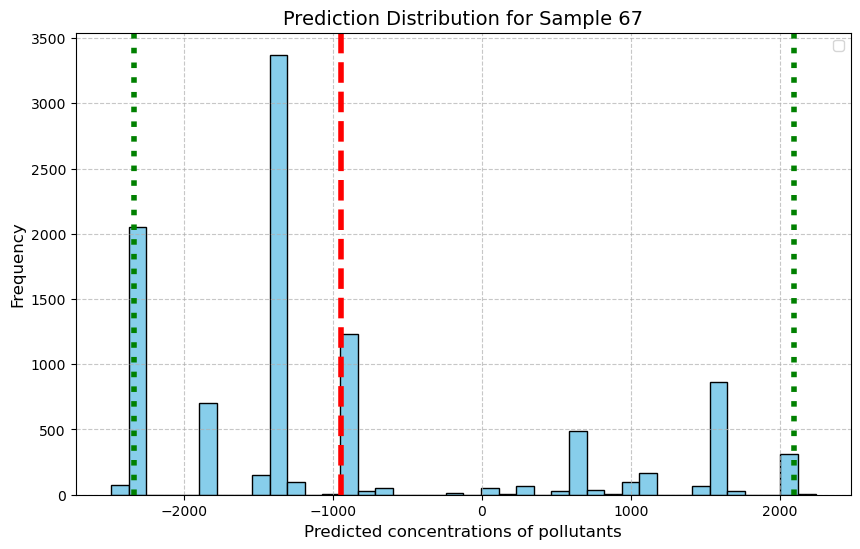

In [80]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本67.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 67], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[67], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[67], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[67], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 67', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本68.png


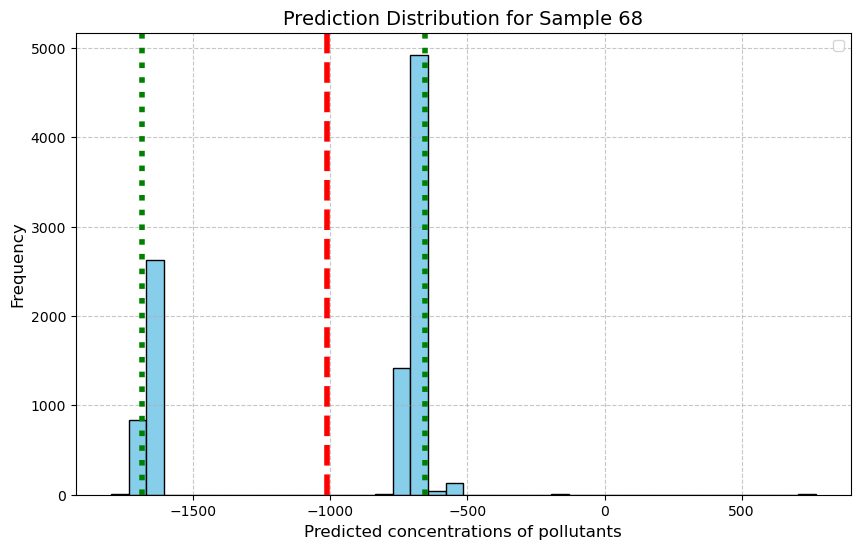

In [81]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本68.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 68], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[68], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[68], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[68], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 68', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本69.png


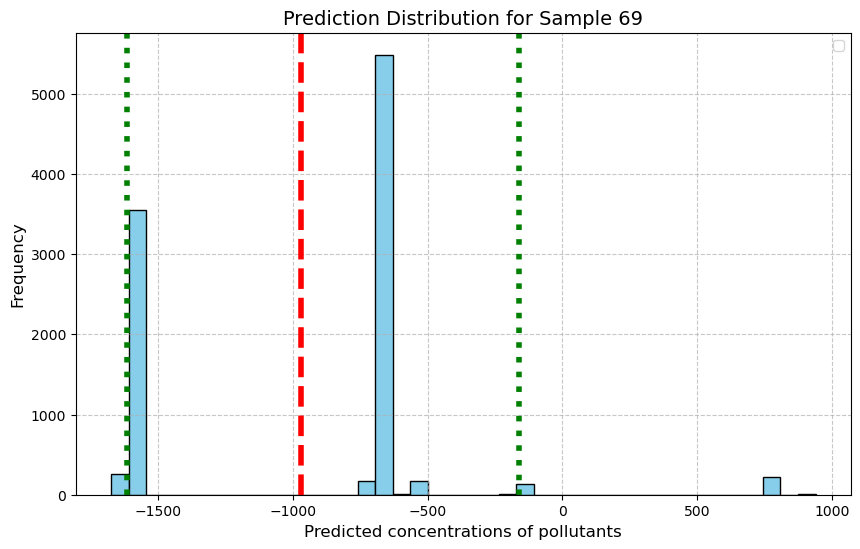

In [82]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本69.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 69], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[69], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[69], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[69], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 69', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本70.png


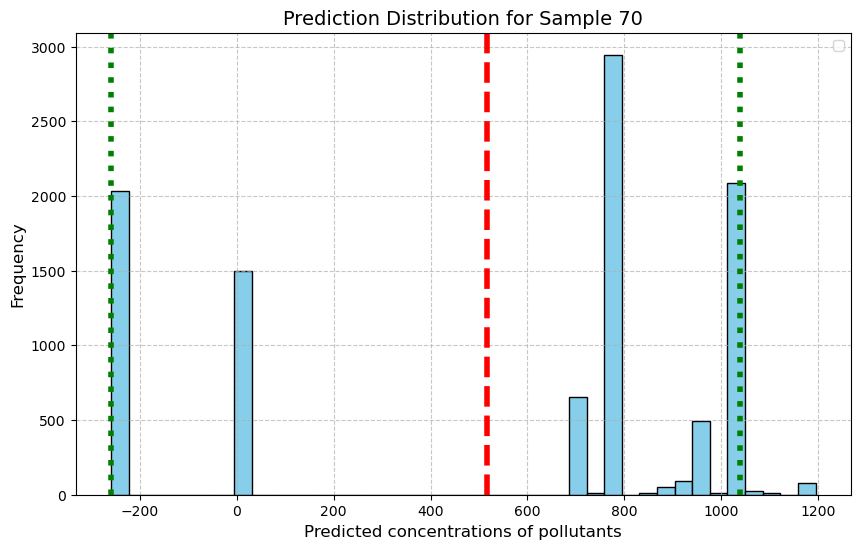

In [83]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本70.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 70], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[70], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[70], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[70], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 70', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本71.png


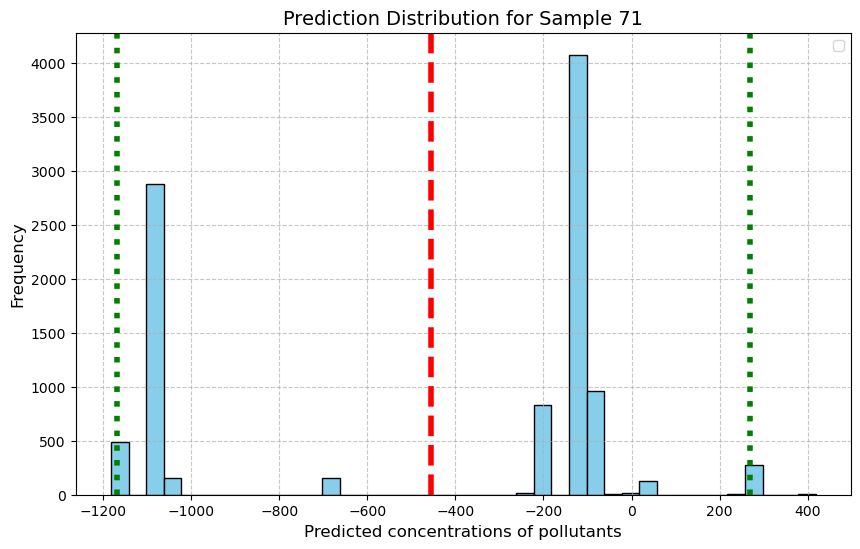

In [84]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本71.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 71], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[71], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[71], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[71], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 71', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本72.png


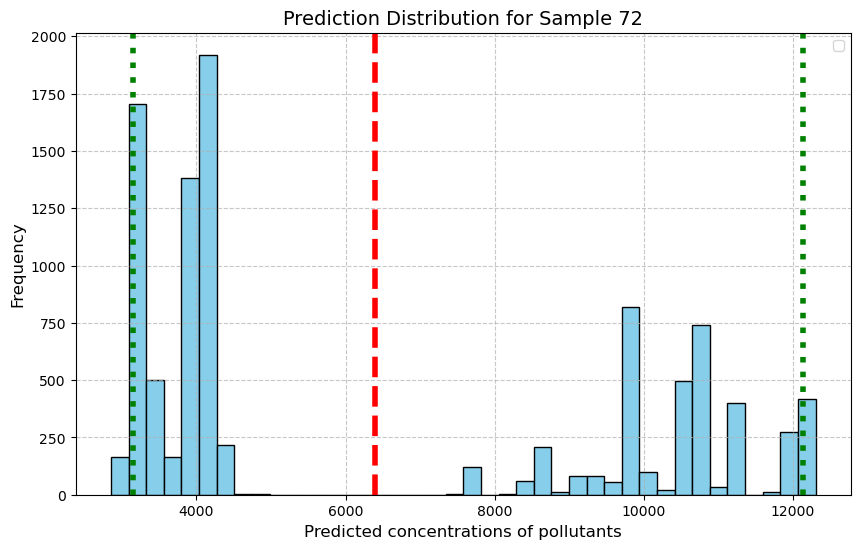

In [85]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本72.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 72], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[72], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[72], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[72], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 72', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本73.png


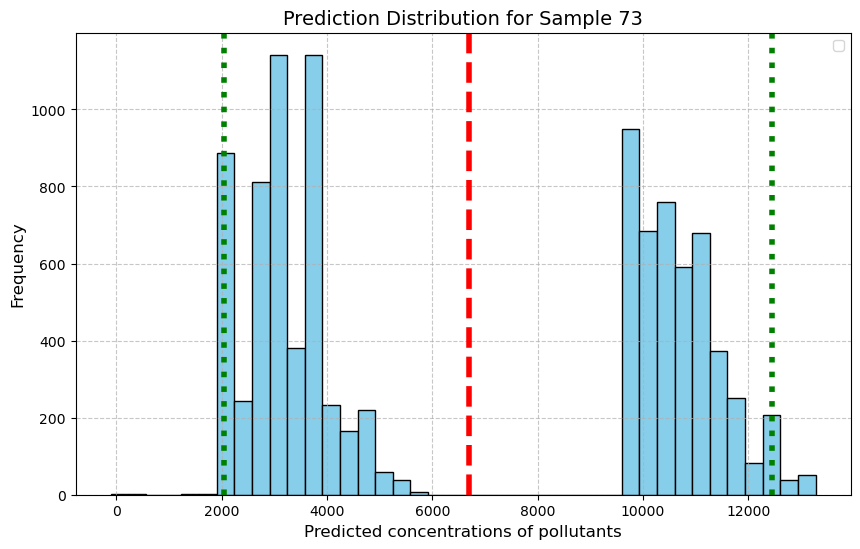

In [86]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本73.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 73], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[73], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[73], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[73], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 73', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本74.png


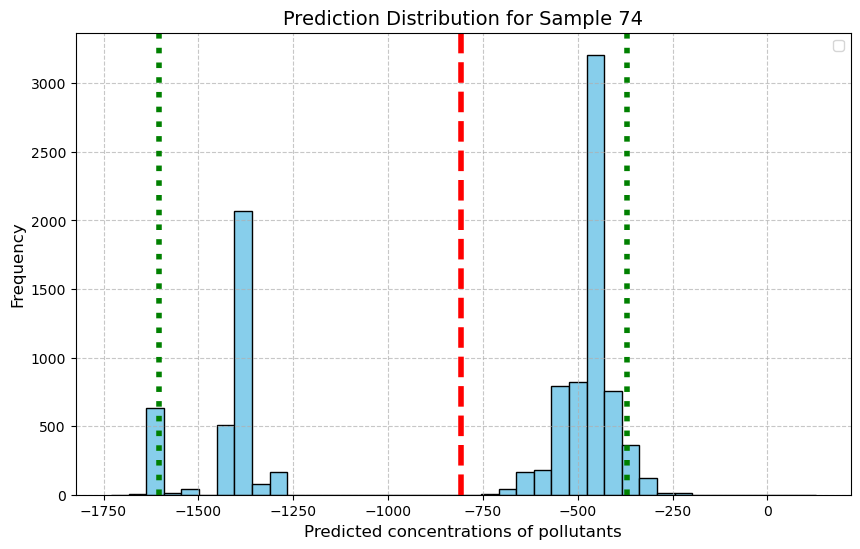

In [87]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本74.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 74], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[74], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[74], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[74], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 74', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本75.png


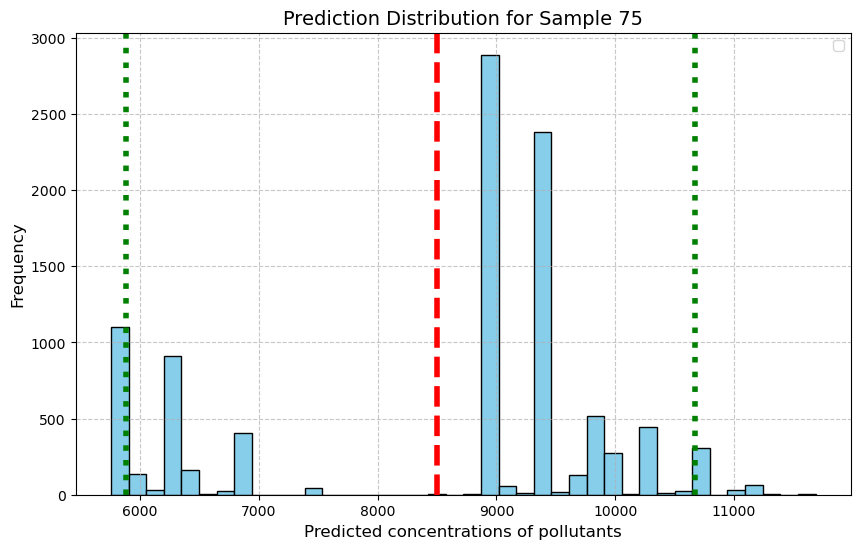

In [88]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本75.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 75], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[75], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[75], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[75], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 75', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本76.png


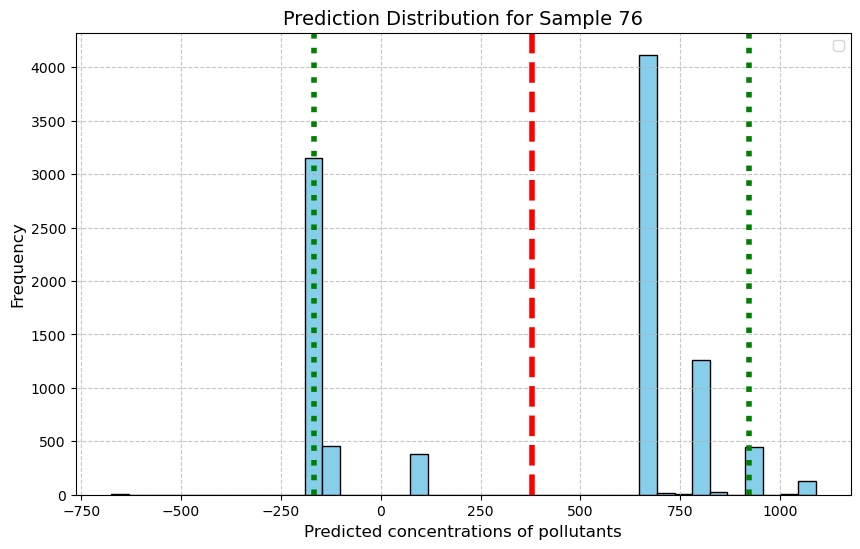

In [89]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本76.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 76], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[76], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[76], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[76], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 76', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本77.png


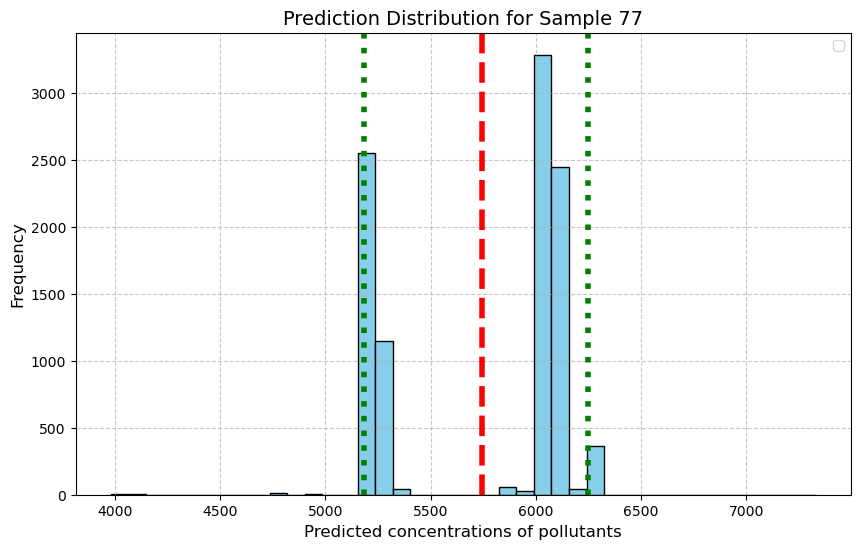

In [90]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本77.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 77], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[77], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[77], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[77], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 77', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本78.png


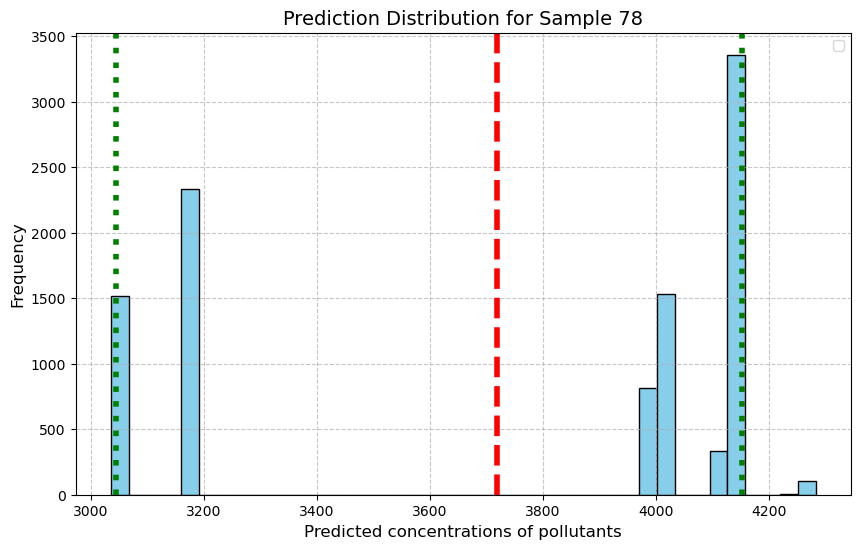

In [91]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本78.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 78], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[78], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[78], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[78], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 78', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本79.png


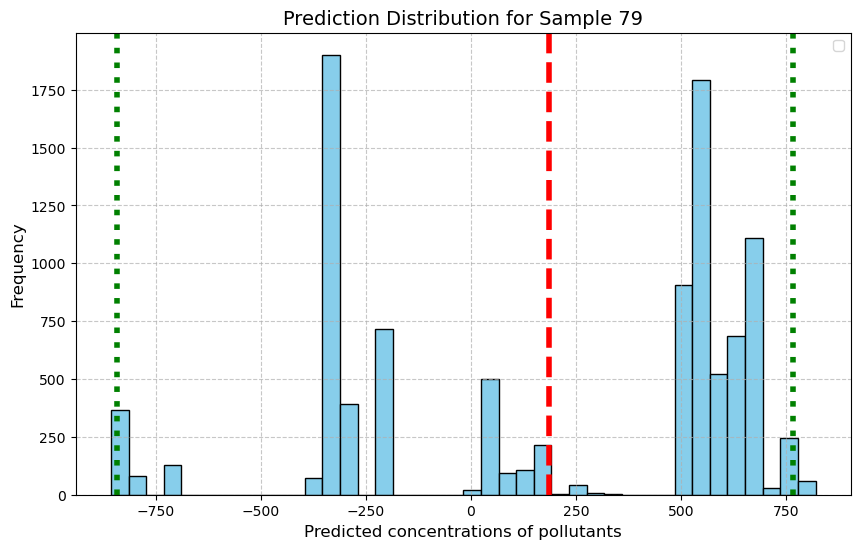

In [92]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本79.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 79], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[79], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[79], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[79], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 79', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本80.png


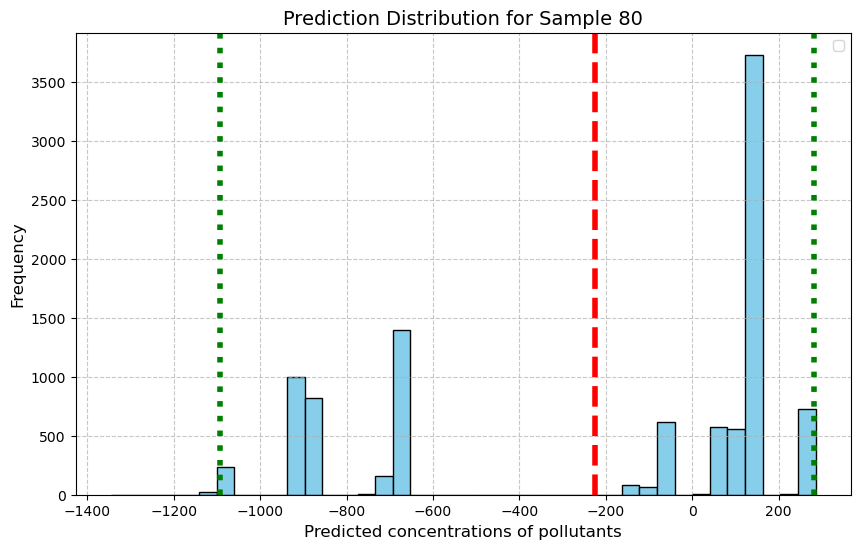

In [93]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本80.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 80], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[80], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[80], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[80], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 80', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本81.png


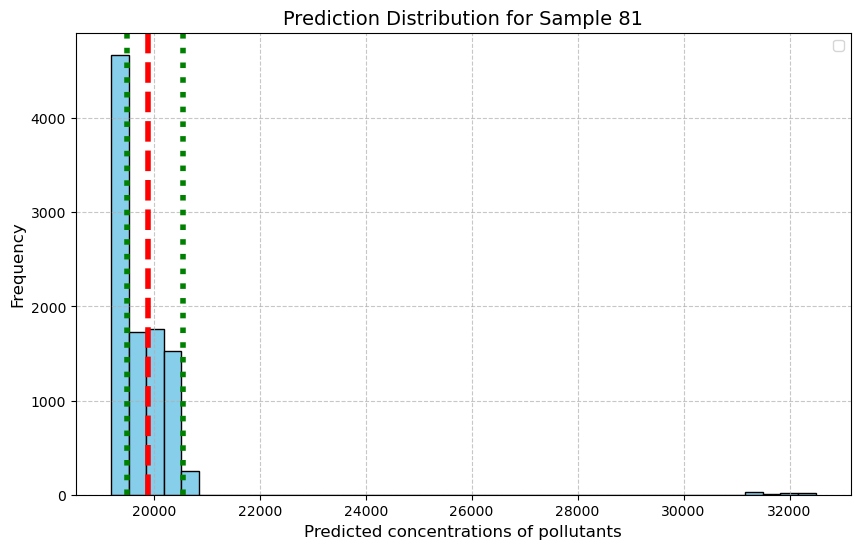

In [94]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本81.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 81], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[81], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[81], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[81], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 81', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本82.png


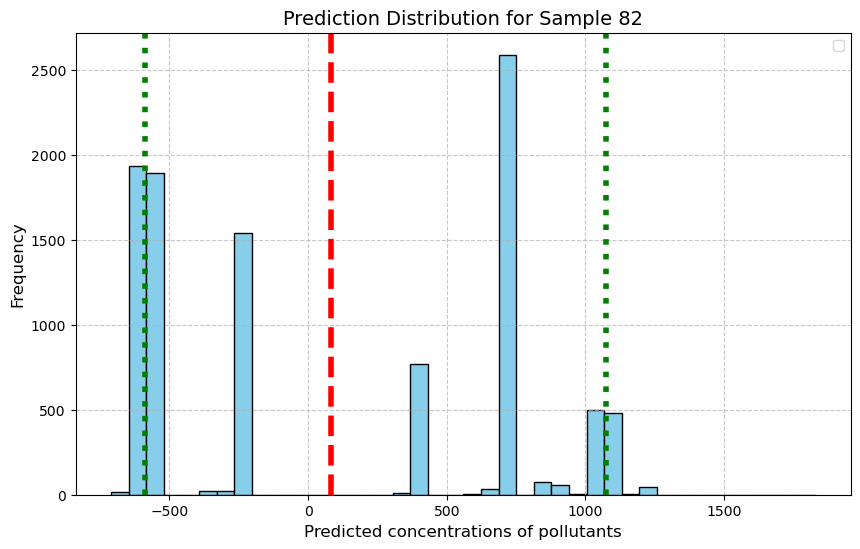

In [95]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本82.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 82], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[82], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[82], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[82], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 82', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本83.png


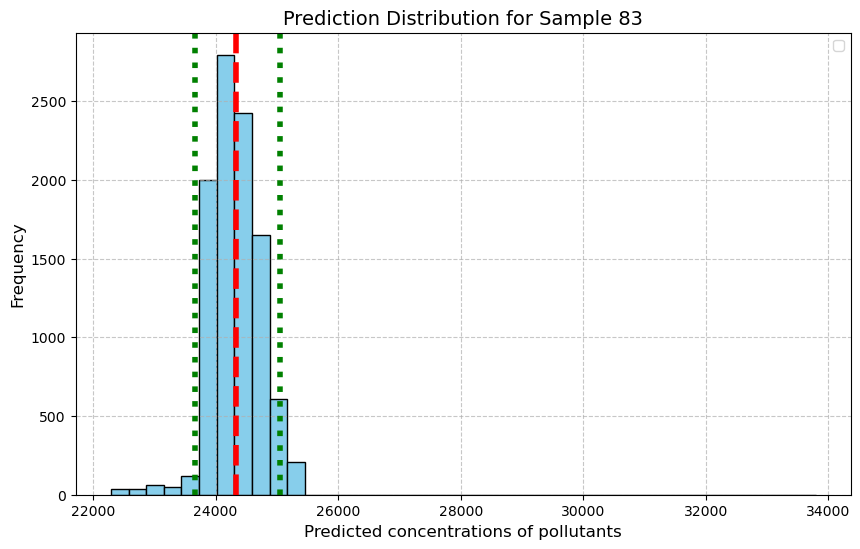

In [96]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本83.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 83], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[83], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[83], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[83], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 83', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本84.png


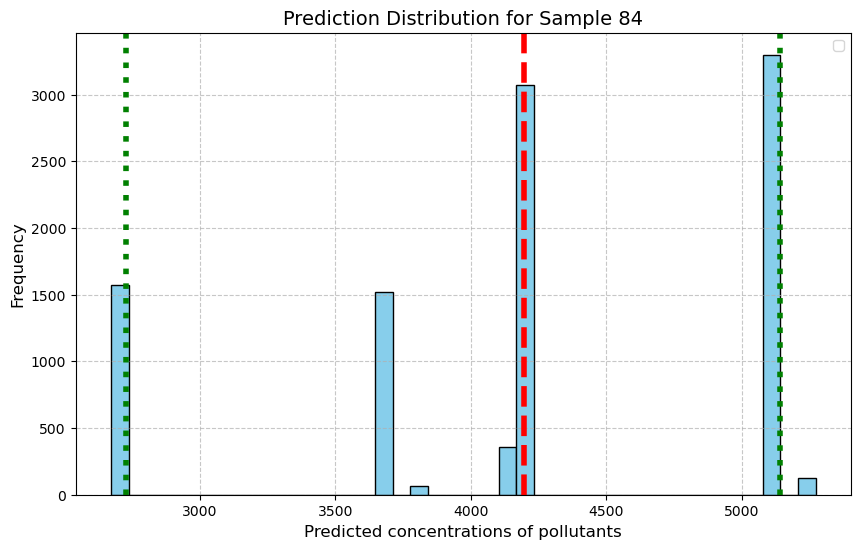

In [97]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本84.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 84], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[84], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[84], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[84], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 84', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本85.png


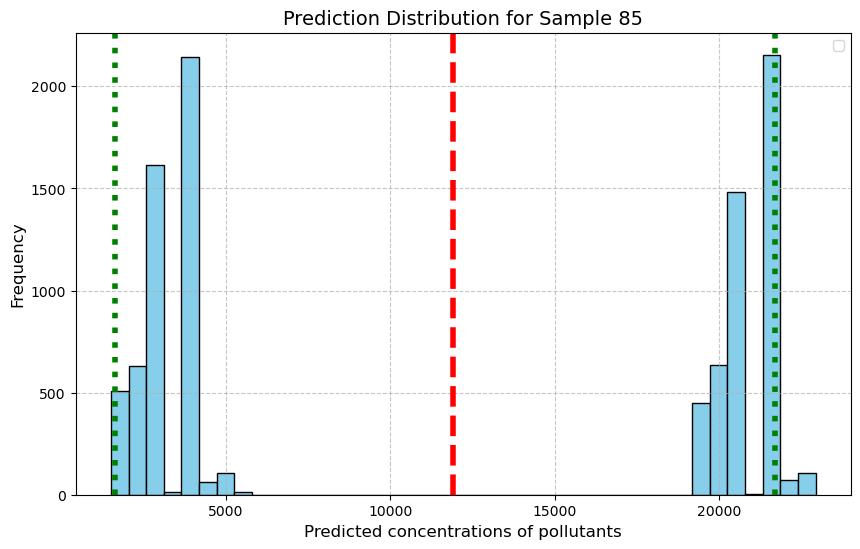

In [98]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本85.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 85], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[85], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[85], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[85], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 85', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本86.png


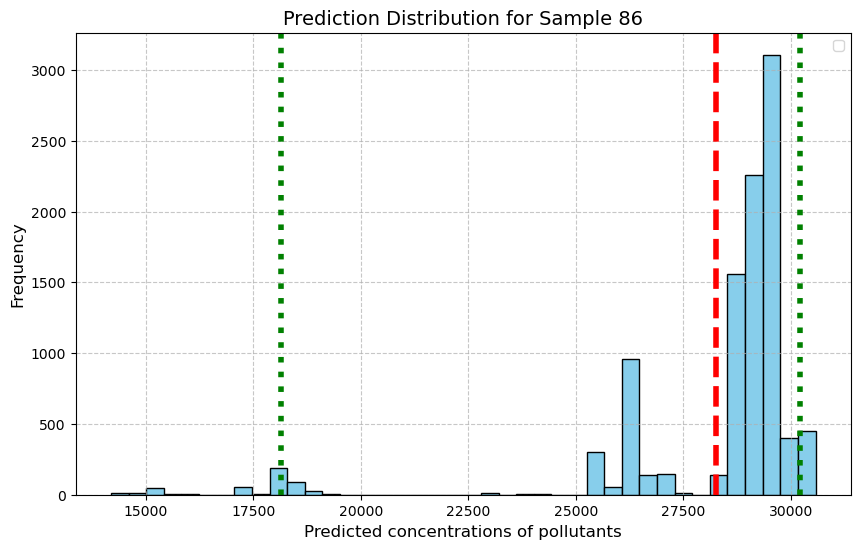

In [99]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本86.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 86], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[86], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[86], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[86], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 86', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本87.png


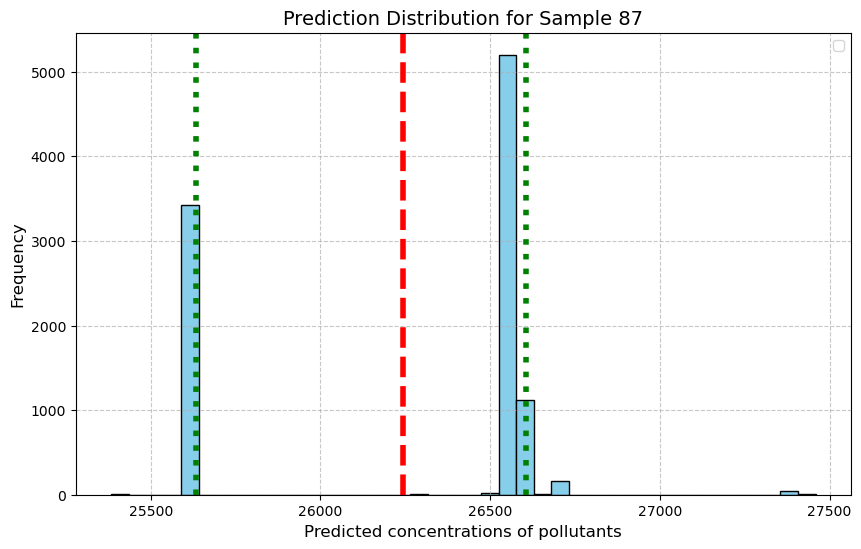

In [100]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本87.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 87], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[87], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[87], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[87], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 87', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图形已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化\样本88.png


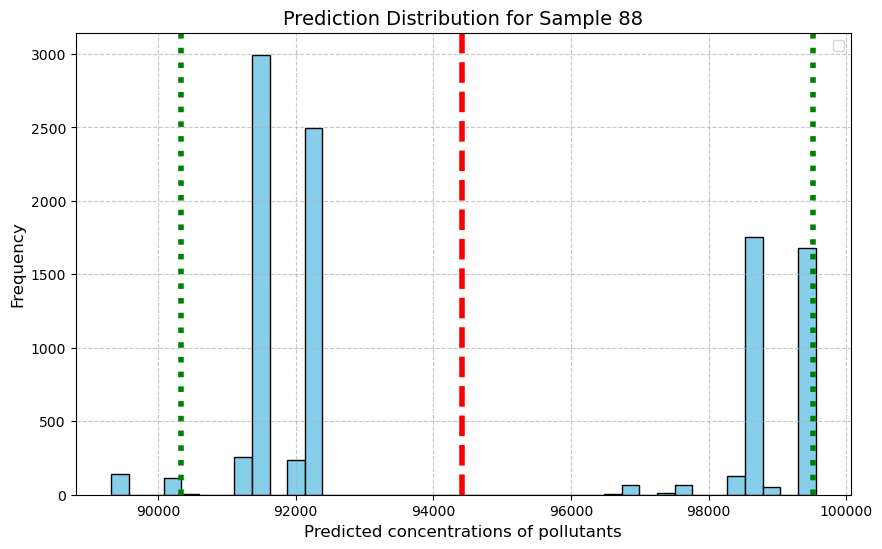

In [101]:
save_dir = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\不确定性量化"
file_name = "样本88.png"

os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.hist(all_preds[:, 88], bins=40, color='skyblue', edgecolor='k')
plt.axvline(mean_pred[88], color='red', linewidth=4, linestyle='--')
plt.axvline(lower_pred[88], color='green', linewidth=4, linestyle=':')
plt.axvline(upper_pred[88], color='green', linewidth=4, linestyle=':')
plt.title('Prediction Distribution for Sample 88', fontsize=14)
plt.xlabel('Predicted concentrations of pollutants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 

full_path = os.path.join(save_dir, file_name)
plt.savefig(full_path, dpi=300, bbox_inches='tight') 
print(f"图形已保存至: {full_path}")

plt.show()  

In [102]:
import numpy as np
from scipy.stats import mode

mean_pred = np.mean(all_preds, axis=0)
median_pred = np.median(all_preds, axis=0)
lower_pred = np.percentile(all_preds, 2.5, axis=0)
upper_pred = np.percentile(all_preds, 97.5, axis=0)

mode_pred, _ = mode(all_preds, axis=0, keepdims=False)

for i in range(len(mean_pred)):
    print(f"样本{i}: 均值={mean_pred[i]:.3f}, 中位数={median_pred[i]:.3f}, 众数={mode_pred[i]:.3f}, 95%置信区间=({lower_pred[i]:.3f}, {upper_pred[i]:.3f})")


样本0: 均值=34219.320, 中位数=32918.559, 众数=32860.957, 95%置信区间=(32042.422, 40727.270)
样本1: 均值=1431.663, 中位数=1755.275, 众数=1856.599, 95%置信区间=(592.539, 1891.232)
样本2: 均值=10056.535, 中位数=9849.102, 众数=9790.514, 95%置信区间=(9087.121, 10825.134)
样本3: 均值=-145.212, 中位数=82.002, 众数=84.772, 95%置信区间=(-886.429, 1412.417)
样本4: 均值=1020.897, 中位数=567.847, 众数=76.651, 95%置信区间=(-674.943, 5009.444)
样本5: 均值=-287.537, 中位数=-2.107, 众数=239.864, 95%置信区间=(-1058.583, 382.810)
样本6: 均值=-1227.090, 中位数=-902.370, 众数=-887.552, 95%置信区间=(-2066.306, -467.125)
样本7: 均值=4775.202, 中位数=4375.404, 众数=4374.891, 95%置信区间=(4360.036, 5354.511)
样本8: 均值=4534.075, 中位数=4826.768, 众数=4828.628, 95%置信区间=(3917.935, 5022.860)
样本9: 均值=301.095, 中位数=618.809, 众数=618.809, 95%置信区间=(-334.958, 666.741)
样本10: 均值=12592.315, 中位数=12107.887, 众数=12048.359, 95%置信区间=(11884.300, 18778.938)
样本11: 均值=13700.579, 中位数=14852.707, 众数=14840.044, 95%置信区间=(3012.572, 15708.719)
样本12: 均值=-203.110, 中位数=88.738, 众数=157.953, 95%置信区间=(-890.381, 300.545)
样本13: 均值=3443.379, 中位数=2953.365, 众数=